#  Analyse spectra ADR holo at AuxTel for Configuration PSF1D REBIN = 2

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : June 27th  2022
- last update : June 27th 2022

- **kernel anaconda3_auxtel** at CC or **python 3** locally


## ANalyse ADR subtraction

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

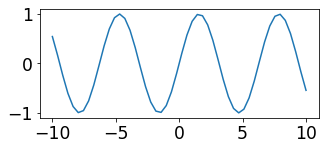

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-09-09'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor, dumpParameters, FullForwardModelFitWorkspace,  run_ffm_minimisation, plot_comparison_truth,dumpfitparameters
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config,set_logger
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
import logging

In [13]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

In [16]:
import pickle

# Function

In [17]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [19]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [20]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [21]:
my_logger = logging

In [22]:
# path index for each month
DATE="20220316"
#DATE="20211104"
filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
imagemode = "postISRCCD"
#imagemode = "unflattened"

In [23]:
version="v5.0"

In [24]:
# Choose the config filename
list_of_spectractorconfigfiles= ['auxtel_config_holo_DECONVOLUTION_PSF1D.ini' ,
                                 'auxtel_config_holo_DECONVOLUTION_PSF2D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_FFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_PSF2DFFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2FFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DFFM300650.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF2D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotA.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotB.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotC.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotD.ini']
config_idx = 5    

configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
#configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]
configdir = "config_" + (list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_")[-1]).split(".") [0]

In [25]:
configdir 

'config_DECONVOLUTION_REBIN2FFM'

In [26]:
load_config(configfilename)

In [27]:
#parameters.LAMBDA_MAX=700
#parameters.LAMBDA_MIN=300

In [28]:
dumpParameters()

ASTROMETRYNET_DIR 
BGD_ORDER 1
CALIB_BGD_NPARAMS 4
CALIB_BGD_ORDER 3
CALIB_BGD_WIDTH 15
CALIB_PEAK_WIDTH 7
CALIB_SAVGOL_ORDER 2
CALIB_SAVGOL_WINDOW 5
CCD_ARCSEC2RADIANS 4.84813681109536e-06
CCD_GAIN 1.1
CCD_IMSIZE 2048
CCD_MAXADU 170000
CCD_PIXEL2ARCSEC 0.1904
CCD_PIXEL2MM 0.02
CCD_REBIN 2
CONFIG_DIR /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/../config/
DEBUG False
DEBUG_LOGGING False
DISPERSER_DIR /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/
DISPLAY False
DISTANCE2CCD 175
DISTANCE2CCD_ERR 0.75
FGB37 {'label': 'FGB37', 'min': 350, 'max': 750}
FILTERS [{'label': 'RG715', 'min': 690, 'max': 1100}, {'label': 'FGB37', 'min': 350, 'max': 750}, {'label': 'Halfa', 'min': 0.0006431, 'max': 0.0006686999999999999}, {'label': 'Z-Gunn', 'min': 800, 'max': 1100}]
FLAM_TO_ADURATE 5175865186660.421
GRATING_ORDER_2OVER1 0.1
GROOVES_PER_MM 350
HAL

In [29]:
configmode = list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_DECONVOLUTION_")[-1].split(".") [0]
configmode

'REBIN2FFM'

# Path

In [30]:
HOSTCC=True
LAPTOP=False

In [31]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
        path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)

else:
    if not LAPTOP:
        path_auxtel="/Users/sylvie/DATA/AuxTelData2022"
        path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
        path_spectractor_config=os.path.join(path_spectractor,"config")
        path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
        if configdir == "":
            path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
        else:
            path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
            path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
            path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
            path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)
    else:
        path_auxtel="/Users/dagoret/DATA/AuxTelData2022"
        path_spectractor=os.path.join(path_auxtel,"/Users/dagoret/MacOSX/GitHub/LSST/Spectractor")
        path_spectractor_config=os.path.join(path_spectractor,"config")
        path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
        if configdir == "":
            path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
        else:
            path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
            path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
            path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
            path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)
                

In [32]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316'

In [33]:
! ls -l $path_output_spectractor

total 0
drwxr-xr-x 1 dagoret lsst 2 Jul 10 12:23 2022031600330
drwxr-xr-x 1 dagoret lsst 2 Jul  9 15:19 2022031600337
drwxr-xr-x 1 dagoret lsst 2 Jul  9 16:10 2022031600344
drwxr-xr-x 1 dagoret lsst 2 Jul  9 16:40 2022031600345
drwxr-xr-x 1 dagoret lsst 2 Jul  9 19:07 2022031600351
drwxr-xr-x 1 dagoret lsst 2 Jul  9 20:12 2022031600352
drwxr-xr-x 1 dagoret lsst 2 Jul  9 20:36 2022031600358
drwxr-xr-x 1 dagoret lsst 2 Jul  9 21:58 2022031600359
drwxr-xr-x 1 dagoret lsst 2 Jul  9 22:22 2022031600365


In [34]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_config_holo_DECONVOLUTION_REBIN2FFM.ini


In [35]:
load_config(configfilename)

## Logbook for file selection

In [36]:
filename_logbook='logbooks/auxtellogbook_'+filterdispersername+"_"+DATE+'_' + version+'.csv'

In [37]:
df=pd.read_csv(filename_logbook,index_col=0)

In [38]:
pd.set_option('display.max_rows', None)

In [39]:
df

index                     date  \
0       0  2022-03-17T01:59:37.776   
1       1  2022-03-17T02:00:10.693   
2       2  2022-03-17T02:03:04.275   
3       3  2022-03-17T02:03:37.365   
4       4  2022-03-17T02:06:31.026   
5       5  2022-03-17T02:07:03.927   
6       6  2022-03-17T02:11:00.681   
7       7  2022-03-17T02:11:33.581   
8       8  2022-03-17T02:14:30.261   
9       9  2022-03-17T02:15:03.181   
10     10  2022-03-17T02:17:59.397   
11     11  2022-03-17T02:18:32.481   
12     12  2022-03-17T02:22:39.026   
13     13  2022-03-17T02:23:12.104   
14     14  2022-03-17T02:26:07.782   
15     15  2022-03-17T02:26:40.735   
16     16  2022-03-17T02:29:37.041   
17     17  2022-03-17T02:30:10.043   
18     18  2022-03-17T02:34:15.754   
19     19  2022-03-17T02:34:48.848   
20     20  2022-03-17T02:38:56.232   
21     21  2022-03-17T02:39:29.123   
22     22  2022-03-17T03:11:58.564   
23     23  2022-03-17T03:12:31.562   
24     24  2022-03-17T03:15:28.519   
25     25  2022-03-17T03:16:01.707   
26     26  2022-03-17T03:21:49.842   
27     27  2022-03-17T03:22:22.856   

                                                 path  \
0   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
1   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
2   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
3   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
4   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
5   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
6   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
7   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
8   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
9   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
10  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
11  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
12  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
13  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
14  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
15  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
16  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
17  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
18  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
19  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
20  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
21  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
22  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
23  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
24  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
25  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
26  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
27  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   

                                      file  num    object   filter  disperser  \
0   exposure_2022031600330_postisrccd.fits  330   eta dor  empty_1  holo4_003   
1   exposure_2022031600331_postisrccd.fits  331   eta dor  empty_1  holo4_003   
2   exposure_2022031600337_postisrccd.fits  337   eta dor  empty_1  holo4_003   
3   exposure_2022031600338_postisrccd.fits  338   eta dor  empty_1  holo4_003   
4   exposure_2022031600344_postisrccd.fits  344   eta dor  empty_1  holo4_003   
5   exposure_2022031600345_postisrccd.fits  345   eta dor  empty_1  holo4_003   
6   exposure_2022031600351_postisrccd.fits  351  HD111980  empty_1  holo4_003   
7   exposure_2022031600352_postisrccd.fits  352  HD111980  empty_1  holo4_003   
8   exposure_2022031600358_postisrccd.fits  358  HD111980  empty_1  holo4_003   
9   exposure_2022031600359_postisrccd.fits  359  HD111980  empty_1  holo4_003   
10  exposure_2022031600365_postisrccd.fits  365  HD111980  empty_1  holo4_003   
11  exposure_2022031600366_postisrccd.fits  366  HD111980  empty_1  holo4_003   
12  exposure_2022031600372_postisrccd.fits  372   eta dor  empty_1  holo4_003   
13  exposure_2022031600373_postisrccd.fits  373   eta dor  empty_1  holo4_003   
14  exposure_2022031600379_posti

## Selection of input files

In [40]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [41]:
df_good=df
df_good["quality"] = 1

In [42]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031600330_postisrccd.fits
exposure_2022031600331_postisrccd.fits
exposure_2022031600337_postisrccd.fits
exposure_2022031600338_postisrccd.fits
exposure_2022031600344_postisrccd.fits
exposure_2022031600345_postisrccd.fits
exposure_2022031600351_postisrccd.fits
exposure_2022031600352_postisrccd.fits
exposure_2022031600358_postisrccd.fits
exposure_2022031600359_postisrccd.fits
exposure_2022031600365_postisrccd.fits
exposure_2022031600366_postisrccd.fits
exposure_2022031600372_postisrccd.fits
exposure_2022031600373_postisrccd.fits
exposure_2022031600379_postisrccd.fits
exposure_2022031600380_postisrccd.fits
exposure_2022031600386_postisrccd.fits
exposure_2022031600387_postisrccd.fits
exposure_2022031600393_postisrccd.fits
exposure_2022031600394_postisrccd.fits
exposure_2022031600400_postisrccd.fits
exposure_2022031600401_postisrccd.fits
exposure_2022031600420_postisrccd.fits
exposure_2022031600421_postisrccd.fits
exposure_2022031600427_postisrccd.fits
exposure_2022031600428_po

## Selection of Spectractor output files

In [43]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [44]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031600330', '2022031600337', '2022031600344', '2022031600345', '2022031600351', '2022031600352', '2022031600358', '2022031600359', '2022031600365']
00330
---------------------------------------------
2022031600330  	   00330
2022031600330 is a directory
tagname= 00330
dir_plots is not empty
dir_spectration is not empty
00337
---------------------------------------------
2022031600337  	   00337
2022031600337 is a directory
tagname= 00337
dir_plots is not empty
dir_spectration is not empty
00344
---------------------------------------------
2022031600344  	   00344
2022031600344 is a directory
tagname= 00344
dir_plots is not empty
dir_spectration is not empty
00345
---------------------------------------------
2022031600345  	   00345
2022031600345 is a directory
tagname= 00345
dir_plots is not empty
dir_spectration is not empty
00351
---------------------------------------------
2022031600351  	   00351
2022031600351 is a directory
tagname= 00351
dir_plots i

In [45]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600345/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600351/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600352/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/202203160

In [46]:
config

'./config/auxtel_config_holo_DECONVOLUTION_REBIN2FFM.ini'

## Extraction of spectra

In [47]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [48]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec/exposure_2022031600344_postisrccd_spectrum.fits']

In [49]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec/exposure_2022031600344_postisrccd_spectrogram.fits']

In [50]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec/exposure_2022031600344_postisrccd_lines.csv']

In [51]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec/exposure_2022031600344_postisrccd_table.csv']

## Selection of good spectra

In [52]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [53]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

In [54]:
all_num=[]
idx=0
for fullfilename in all_good_spectra_spectrum_files:
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    idx+=1
    
    

In [55]:
if False:
    parameters.DISPLAY=True

    FLAG_ORDER2 = True

    infos = []
    all_lambdas=[]
    all_data=[]
    all_data_err=[]

    if FLAG_ORDER2:
        all_lambdas_order2=[]
        all_data_order2=[]
        all_data_err_order2=[]

    all_num=[]
    all_figs = []


    idx=0
    for fullfilename in all_good_spectra_spectrum_files:
    
        filename = os.path.basename(fullfilename)
        print(idx,")",filename," ",fullfilename)
    
    
        fig=plt.figure(figsize=(16,4))
        ax1 = fig.add_subplot(1, 2, 1)
    
        filename= os.path.basename(fullfilename)
        tag=file_tag_forsorting(filename.split(".")[0])
        all_num.append(tag)
    
   
     
        s=Spectrum(fullfilename, config=config,fast_load=False)
        label=filename.split('.')[0]+" "
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        all_lambdas.append(s.lambdas)
        all_data.append(s.data)
        all_data_err.append(s.err)
    
        if FLAG_ORDER2:
            all_lambdas_order2.append(s.lambdas_order2)
            all_data_order2.append(s.data_order2)
            all_data_err_order2.append(s.err_order2)
    
        ax2 = fig.add_subplot(1, 2, 2)
    
        fullfilename2=all_files_spectrogram[idx]
    
        s.load_spectrogram(fullfilename2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
    
        infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
        plt.show()
        all_figs.append(fig)
    
        idx+=1
    

## View one spectrum

0 ) exposure_2022031600330_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum.fits
set date_obs to 2022-03-17T01:59:23.629
set expo to 20.0
set airmass to 1.38578152736243
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.203330252738939
set dec to -66.0397222222222
set hour_angle to 42.0596414253711
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 646.884280273906
set parallactic_angle to 56.60194005331589


2022-09-09 13:16:55  astropy    _showwarning         WARNING AstropyDeprecationWarning: The update_default_config function is deprecated and may be removed in a future version.
2022-09-09 13:16:55  astropy    _showwarning         WARNING AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead.


target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                           
----------- ------------- ------------- ... --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ... 0.0000590                1


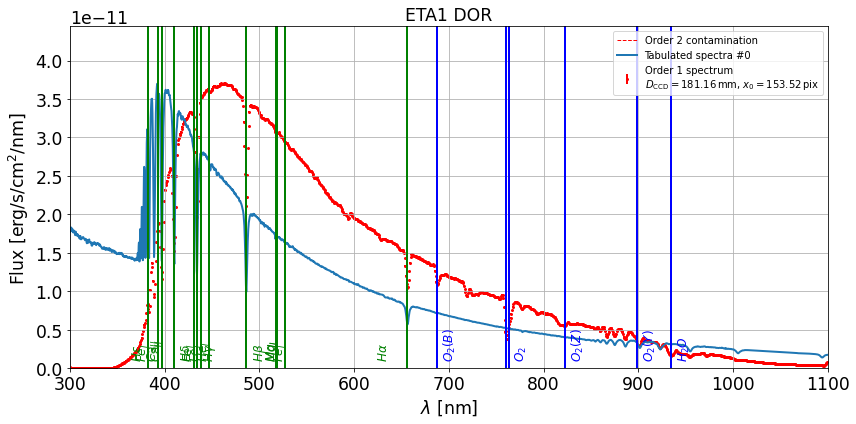

In [56]:
idx=0

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
#s.plot_spectrum(ax=ax1,force_lines=True,label=label)
s.plot_spectrum(ax=ax1,force_lines=True)
    
    
#ax2 = fig.add_subplot(1, 2, 2)
    
#fullfilename2=all_files_spectrogram[idx]
    
#s.load_spectrogram(fullfilename2)
#s.plot_spectrogram(ax=ax2,scale="log")
    

plt.show()
    

# Perform FFM

In [57]:
from spectractor.simulation.adr import adr_calib, flip_and_rotate_adr_to_image_xy_coordinates

In [58]:
fig_FFMpoutputdir = "fig_FFM_" + configdir
if not os.path.exists(fig_FFMpoutputdir):
        os.makedirs(fig_FFMpoutputdir)

In [59]:
parameters.DISPLAY = True
parameters.DEBUG = True
parameters.VERBOSE = True
parameters.LSST_SAVEFIGPATH = fig_FFMpoutputdir

In [60]:
# Want to plot some information
# if 'LBDAS_T' in spec.header: plot_comparison_truth(spec, w)
# s.header['LBDAS_T'] = True

In [61]:
w = FullForwardModelFitWorkspace(s, verbose=parameters.VERBOSE, plot=True, live_fit=True,
                                         amplitude_priors_method="spectrum")

2022-09-09 13:17:00  FullForwardModelFitWorkspace __init__             INFO   
	Full forward model fitting with regularisation parameter r=1.


In [62]:
dumpfitparameters(w,my_logger)

2022-09-09 13:17:01  root       dumpfitparameters    INFO   

- fit param #0 :: A2 = 1.0 	 fixed = True 	 bounds 0.000 - 20.000
- fit param #1 :: D_CCD [mm] = 181.1585363472343 	 fixed = True 	 bounds 178.909 - 183.409
- fit param #2 :: shift_x [pix] = -0.5871969096971504 	 fixed = True 	 bounds -5.000 - 5.000
- fit param #3 :: shift_y [pix] = 0.0 	 fixed = False 	 bounds -50.000 - 50.000
- fit param #4 :: angle [deg] = 0.203330252738939 	 fixed = False 	 bounds -90.000 - 90.000
- fit param #5 :: B = 1.0 	 fixed = True 	 bounds 0.200 - 5.000
- fit param #6 :: R = 0.0 	 fixed = True 	 bounds -360.000 - 360.000
- fit param #7 :: P [hPa] = 743.55 	 fixed = True 	 bounds 300.000 - 1100.000
- fit param #8 :: T [Celsius] = 10.6 	 fixed = False 	 bounds -100.000 - 100.000
- fit param #9 :: x_c_0 = 1000.0007321003534 	 fixed = True 	 bounds -inf - inf
- fit param #10 :: x_c_1 = 575.5000000000003 	 fixed = True 	 bounds -inf - inf
- fit param #11 :: x_c_2 = 3.588854710805207e-13 	 fixed = True 

2022-09-09 13:17:01  spectractor.extractor.extractor run_ffm_minimisation INFO   
 --- Start FFM with adjust_spectrogram_position_parameters --- 
2022-09-09 13:17:23  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=5.7236e+07 initial chisq_red=1363
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [-3.58256332  0.1651779 ]
	New parameters: [-3.58256332  0.36850815]
	Final cost=2.4953e+07 final chisq_red=594.21 computed in 19.03s
2022-09-09 13:17:26  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-09-09 13:17:27  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.
2022-09-09 13:17:47  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=2.4953e+07 initial chisq_red=594.21
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ 0.28694305 -0.003

	 >>>>> cov =  [[ 3.52337008e-08 -2.60611455e-09]
 [-2.60611455e-09  2.65580346e-10]] >>>>  cov.shape =  (2, 2)


2022-09-09 13:18:51  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -3.3528 +0.0002 -0.0002
	angle [deg]: 0.37116 +2e-05 -2e-05
	
2022-09-09 13:18:56  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-09-09 13:18:58  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.
2022-09-09 13:18:59  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-09-09 13:18:59  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/parameters_correlation.pdf.


>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 3.52337008e-08 -2.60611455e-09]
 [-2.60611455e-09  2.65580346e-10]]  type =  <class 'numpy.ndarray'>  shape =  (2, 2)
>>>> 	 	  k =  0
>>>>> 	 save_parameters_summary ::  k =  0  ,  ip =  3  p[ip] =  -3.352827317990967  , label =  shift_y [pix]  , cov =  3.523370076056093e-08
>>>> 	 	  k =  1
>>>>> 	 save_parameters_summary ::  k =  1  ,  ip =  4  p[ip] =  0.3711589941967967  , label =  angle [deg]  , cov =  2.6558034600919216e-10
>>>> 	 	  k =  2
>>>>> 	 save_parameters_summary ::  SKIP k =  2  >=  kmax =  2
>>>> 	 	  k =  3
>>>>> 	 save_parameters_summary ::  SKIP k =  3  >=  kmax =  2
>>>> 	 	  k =  4
>>>>> 	 save_parameters_summary ::  SKIP k =  4  >=  kmax =  2
>>>> 	 	  k =  

2022-09-09 13:18:59  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-09-09 13:18:59  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-09-09 13:19:03  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-09-09 13:19:04  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.
2022-09-09 13:19:05  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Start

	 >>>>> cov =  [[ 2.79446474e-07 -1.50436000e-08 -1.22043220e-05 -6.65901903e-08
  -1.44343862e-07 -1.92876210e-08 -2.17011085e-08 -4.89909546e-08
  -1.38293941e-08]
 [-1.50436000e-08  9.70617720e-10  3.36017812e-07  2.18674265e-09
   5.76724522e-09  5.48811102e-10  9.04559802e-10  2.39482393e-09
   4.69078130e-10]
 [-1.22043220e-05  3.36017812e-07  2.18805414e-03  8.58102987e-06
   2.00661984e-05 -2.32630731e-06  2.18247571e-06  5.29962483e-06
  -4.97081995e-08]
 [-6.65901903e-08  2.18674265e-09  8.58102987e-06  1.93883048e-06
   2.45579419e-06  3.56013171e-06  6.52169545e-07  8.31944431e-07
   1.21807149e-06]
 [-1.44343862e-07  5.76724522e-09  2.00661984e-05  2.45579419e-06
   5.77338583e-06  4.03401752e-06  8.31014172e-07  1.92177769e-06
   1.40354762e-06]
 [-1.92876210e-08  5.48811102e-10 -2.32630731e-06  3.56013171e-06
   4.03401752e-06  1.04476180e-05  1.21015531e-06  1.39089978e-06
   3.50560165e-06]
 [-2.17011085e-08  9.04559802e-10  2.18247571e-06  6.52169545e-07
   8.31014172

2022-09-09 13:23:39  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -2.8603 +0.0005 -0.0005
	angle [deg]: 0.36161 +3e-05 -3e-05
	T [Celsius]: -100.00 +0.05 -0.05
	gamma_0: 4.410 +0.001 -0.001
	gamma_1: 0.447 +0.002 -0.002
	gamma_2: 2.185 +0.003 -0.003
	alpha_0: 2.0132 +0.0005 -0.0005
	alpha_1: 0.0596 +0.0008 -0.0008
	alpha_2: 0.441 +0.001 -0.001
	
2022-09-09 13:23:43  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-09-09 13:23:45  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.
2022-09-09 13:23:46  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-09-09 13:23:46  FullForwardM

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 2.79446474e-07 -1.50436000e-08 -1.22043220e-05 -6.65901903e-08
  -1.44343862e-07 -1.92876210e-08 -2.17011085e-08 -4.89909546e-08
  -1.38293941e-08]
 [-1.50436000e-08  9.70617720e-10  3.36017812e-07  2.18674265e-09
   5.76724522e-09  5.48811102e-10  9.04559802e-10  2.39482393e-09
   4.69078130e-10]
 [-1.22043220e-05  3.36017812e-07  2.18805414e-03  8.58102987e-06
   2.00661984e-05 -2.32630731e-06  2.18247571e-06  5.29962483e-06
  -4.97081995e-08]
 [-6.65901903e-08  2.18674265e-09  8.58102987e-06  1.93883048e-06
   2.45579419e-06  3.56013171e-06  6.52169545e-07  8.31944431e-07
   1.21807149e-06]
 [-1.44343862e-07  5.76724522e-09  2.00661984e-05  2.45579419e-06
   5.77338583e-06  4.03

2022-09-09 13:23:47  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-09-09 13:23:47  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-09-09 13:23:47  spectractor.extractor.extractor run_ffm_minimisation INFO   
 --- after  run_minimisation ---
2022-09-09 13:23:47  spectractor.extractor.extractor dumpfitparameters    INFO   

- fit param #0 :: A2 = 1.0 	 fixed = True 	 bounds 0.000 - 20.000
- fit param #1 :: D_CCD [mm] = 181.1585363472343 	 fixed = True 	 bounds 178.909 - 183.409
- fit param #2 :: shift_x [pix]

	 >>>>> cov =  [[ 7.49599710e-07 -4.01910390e-08 -3.32254029e-05 -1.16836195e-07
  -2.86886764e-07  4.52938512e-08 -3.18587550e-08 -8.74828904e-08
   8.69533148e-09]
 [-4.01910390e-08  2.31514475e-09  1.46263131e-06  5.01810520e-09
   1.36079854e-08 -3.07904822e-09  1.48824507e-09  4.50665570e-09
  -7.43169786e-10]
 [-3.32254029e-05  1.46263131e-06  3.13752401e-03  1.06255494e-05
   2.55239922e-05 -4.77880770e-06  2.53174866e-06  6.66554081e-06
  -1.18214424e-06]
 [-1.16836195e-07  5.01810520e-09  1.06255494e-05  1.99625109e-06
   2.62568572e-06  3.58506886e-06  6.58607100e-07  8.70048619e-07
   1.20103233e-06]
 [-2.86886764e-07  1.36079854e-08  2.55239922e-05  2.62568572e-06
   6.08567513e-06  4.25895991e-06  8.68533015e-07  1.99360347e-06
   1.44540288e-06]
 [ 4.52938512e-08 -3.07904822e-09 -4.77880770e-06  3.58506886e-06
   4.25895991e-06  1.07471346e-05  1.19584547e-06  1.43585389e-06
   3.55708027e-06]
 [-3.18587550e-08  1.48824507e-09  2.53174866e-06  6.58607100e-07
   8.68533015

2022-09-09 13:30:40  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -2.6567 +0.0009 -0.0009
	angle [deg]: 0.33855 +5e-05 -5e-05
	T [Celsius]: -100.00 +0.06 -0.06
	gamma_0: 4.525 +0.001 -0.001
	gamma_1: 0.757 +0.002 -0.002
	gamma_2: 1.939 +0.003 -0.003
	alpha_0: 2.0276 +0.0005 -0.0005
	alpha_1: 0.1108 +0.0008 -0.0008
	alpha_2: 0.362 +0.001 -0.001
	
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/fit/fitter.py:1233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex="all")
2022-09-09 13:30:43  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-09-09 13:3

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 7.49599710e-07 -4.01910390e-08 -3.32254029e-05 -1.16836195e-07
  -2.86886764e-07  4.52938512e-08 -3.18587550e-08 -8.74828904e-08
   8.69533148e-09]
 [-4.01910390e-08  2.31514475e-09  1.46263131e-06  5.01810520e-09
   1.36079854e-08 -3.07904822e-09  1.48824507e-09  4.50665570e-09
  -7.43169786e-10]
 [-3.32254029e-05  1.46263131e-06  3.13752401e-03  1.06255494e-05
   2.55239922e-05 -4.77880770e-06  2.53174866e-06  6.66554081e-06
  -1.18214424e-06]
 [-1.16836195e-07  5.01810520e-09  1.06255494e-05  1.99625109e-06
   2.62568572e-06  3.58506886e-06  6.58607100e-07  8.70048619e-07
   1.20103233e-06]
 [-2.86886764e-07  1.36079854e-08  2.55239922e-05  2.62568572e-06
   6.08567513e-06  4.25

2022-09-09 13:30:47  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-09-09 13:30:47  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-09-09 13:30:47  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-09-09 13:30:47  spectractor.extractor.extractor run_ffm_minimisation INFO   
	  niter = 0 : Newton: total computation time: 701.832240819931s
2022-09-09 13:30:47  spectractor.extractor.extractor run_ffm_minimisation IN

	 >>>>> cov =  [[ 7.52201974e-07 -4.02359206e-08 -3.34109147e-05 -1.12580992e-07
  -2.79432700e-07  5.22278524e-08 -3.04104582e-08 -8.49753195e-08
   1.09230434e-08]
 [-4.02359206e-08  2.31247331e-09  1.46687830e-06  4.75585594e-09
   1.31334575e-08 -3.44089232e-09  1.39958926e-09  4.34815228e-09
  -8.57704040e-10]
 [-3.34109147e-05  1.46687830e-06  3.15522766e-03  1.04072168e-05
   2.52256828e-05 -5.14706762e-06  2.46029503e-06  6.56561824e-06
  -1.29611930e-06]
 [-1.12580992e-07  4.75585594e-09  1.04072168e-05  1.97499548e-06
   2.58584104e-06  3.54915221e-06  6.51105204e-07  8.55862946e-07
   1.18862423e-06]
 [-2.79432700e-07  1.31334575e-08  2.52256828e-05  2.58584104e-06
   6.01569350e-06  4.18834122e-06  8.54189798e-07  1.96853399e-06
   1.42003497e-06]
 [ 5.22278524e-08 -3.44089232e-09 -5.14706762e-06  3.54915221e-06
   4.18834122e-06  1.06545667e-05  1.18345010e-06  1.41105626e-06
   3.52338003e-06]
 [-3.04104582e-08  1.39958926e-09  2.46029503e-06  6.51105204e-07
   8.54189798

2022-09-09 13:34:04  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -2.6567 +0.0009 -0.0009
	angle [deg]: 0.33855 +5e-05 -5e-05
	T [Celsius]: -100.00 +0.06 -0.06
	gamma_0: 4.525 +0.001 -0.001
	gamma_1: 0.757 +0.002 -0.002
	gamma_2: 1.939 +0.003 -0.003
	alpha_0: 2.0276 +0.0005 -0.0005
	alpha_1: 0.1108 +0.0008 -0.0008
	alpha_2: 0.362 +0.001 -0.001
	
2022-09-09 13:34:09  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-09-09 13:34:10  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.
2022-09-09 13:34:11  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-09-09 13:34:12  FullForwardM

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 7.52201974e-07 -4.02359206e-08 -3.34109147e-05 -1.12580992e-07
  -2.79432700e-07  5.22278524e-08 -3.04104582e-08 -8.49753195e-08
   1.09230434e-08]
 [-4.02359206e-08  2.31247331e-09  1.46687830e-06  4.75585594e-09
   1.31334575e-08 -3.44089232e-09  1.39958926e-09  4.34815228e-09
  -8.57704040e-10]
 [-3.34109147e-05  1.46687830e-06  3.15522766e-03  1.04072168e-05
   2.52256828e-05 -5.14706762e-06  2.46029503e-06  6.56561824e-06
  -1.29611930e-06]
 [-1.12580992e-07  4.75585594e-09  1.04072168e-05  1.97499548e-06
   2.58584104e-06  3.54915221e-06  6.51105204e-07  8.55862946e-07
   1.18862423e-06]
 [-2.79432700e-07  1.31334575e-08  2.52256828e-05  2.58584104e-06
   6.01569350e-06  4.18

2022-09-09 13:34:12  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-09-09 13:34:12  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-09-09 13:34:12  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-09-09 13:34:12  spectractor.extractor.extractor run_ffm_minimisation INFO   
	  niter = 1 : Newton: total computation time: 906.9596726894379s
2022-09-09 13:34:12  spectractor.extractor.extractor run_ffm_minimisation I

	 >>>>> cov =  [[ 7.45917713e-07 -3.98636514e-08 -3.27651307e-05 -1.12608368e-07
  -2.80279942e-07  5.29768439e-08 -3.04618465e-08 -8.53718316e-08
   1.11610285e-08]
 [-3.98636514e-08  2.29239207e-09  1.42845395e-06  4.75449202e-09
   1.31740574e-08 -3.43042379e-09  1.40367510e-09  4.37171793e-09
  -8.57845929e-10]
 [-3.27651307e-05  1.42845395e-06  3.09205882e-03  1.03564140e-05
   2.50492452e-05 -5.19434408e-06  2.44909505e-06  6.52287535e-06
  -1.30911610e-06]
 [-1.12608368e-07  4.75449202e-09  1.03564140e-05  1.97647493e-06
   2.58787254e-06  3.55112863e-06  6.51397603e-07  8.56219699e-07
   1.18897632e-06]
 [-2.80279942e-07  1.31740574e-08  2.50492452e-05  2.58787254e-06
   6.01821960e-06  4.18919553e-06  8.54548575e-07  1.96878478e-06
   1.42001492e-06]
 [ 5.29768439e-08 -3.43042379e-09 -5.19434408e-06  3.55112863e-06
   4.18919553e-06  1.06651839e-05  1.18386437e-06  1.41091765e-06
   3.52568877e-06]
 [-3.04618465e-08  1.40367510e-09  2.44909505e-06  6.51397603e-07
   8.54548575

2022-09-09 13:37:49  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -2.6567 +0.0009 -0.0009
	angle [deg]: 0.33855 +5e-05 -5e-05
	T [Celsius]: -100.00 +0.06 -0.06
	gamma_0: 4.525 +0.001 -0.001
	gamma_1: 0.757 +0.002 -0.002
	gamma_2: 1.939 +0.003 -0.003
	alpha_0: 2.0276 +0.0005 -0.0005
	alpha_1: 0.1108 +0.0008 -0.0008
	alpha_2: 0.362 +0.001 -0.001
	
2022-09-09 13:37:53  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-09-09 13:37:56  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.
2022-09-09 13:37:57  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-09-09 13:37:57  FullForwardM

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 7.45917713e-07 -3.98636514e-08 -3.27651307e-05 -1.12608368e-07
  -2.80279942e-07  5.29768439e-08 -3.04618465e-08 -8.53718316e-08
   1.11610285e-08]
 [-3.98636514e-08  2.29239207e-09  1.42845395e-06  4.75449202e-09
   1.31740574e-08 -3.43042379e-09  1.40367510e-09  4.37171793e-09
  -8.57845929e-10]
 [-3.27651307e-05  1.42845395e-06  3.09205882e-03  1.03564140e-05
   2.50492452e-05 -5.19434408e-06  2.44909505e-06  6.52287535e-06
  -1.30911610e-06]
 [-1.12608368e-07  4.75449202e-09  1.03564140e-05  1.97647493e-06
   2.58787254e-06  3.55112863e-06  6.51397603e-07  8.56219699e-07
   1.18897632e-06]
 [-2.80279942e-07  1.31740574e-08  2.50492452e-05  2.58787254e-06
   6.01821960e-06  4.18

2022-09-09 13:37:57  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-09-09 13:37:57  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-09-09 13:37:57  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-09-09 13:37:57  spectractor.extractor.extractor run_ffm_minimisation INFO   
	  niter = 2 : Newton: total computation time: 1132.0760006904602s
2022-09-09 13:37:57  spectractor.extractor.extractor run_ffm_minimisation 

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 7.45917713e-07 -3.98636514e-08 -3.27651307e-05 -1.12608368e-07
  -2.80279942e-07  5.29768439e-08 -3.04618465e-08 -8.53718316e-08
   1.11610285e-08]
 [-3.98636514e-08  2.29239207e-09  1.42845395e-06  4.75449202e-09
   1.31740574e-08 -3.43042379e-09  1.40367510e-09  4.37171793e-09
  -8.57845929e-10]
 [-3.27651307e-05  1.42845395e-06  3.09205882e-03  1.03564140e-05
   2.50492452e-05 -5.19434408e-06  2.44909505e-06  6.52287535e-06
  -1.30911610e-06]
 [-1.12608368e-07  4.75449202e-09  1.03564140e-05  1.97647493e-06
   2.58787254e-06  3.55112863e-06  6.51397603e-07  8.56219699e-07
   1.18897632e-06]
 [-2.80279942e-07  1.31740574e-08  2.50492452e-05  2.58787254e-06
   6.01821960e-06  4.18

2022-09-09 13:38:21  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-09-09 13:38:22  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-09-09 13:38:23  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.
2022-09-09 13:38:28  Spectrum   convert_from_ADUrate_to_flam WARNING You ask to convert spectrum already in erg/s/cm$^2$/nm in erg/s/cm^2/nm... check your code ! Skip the instruction.


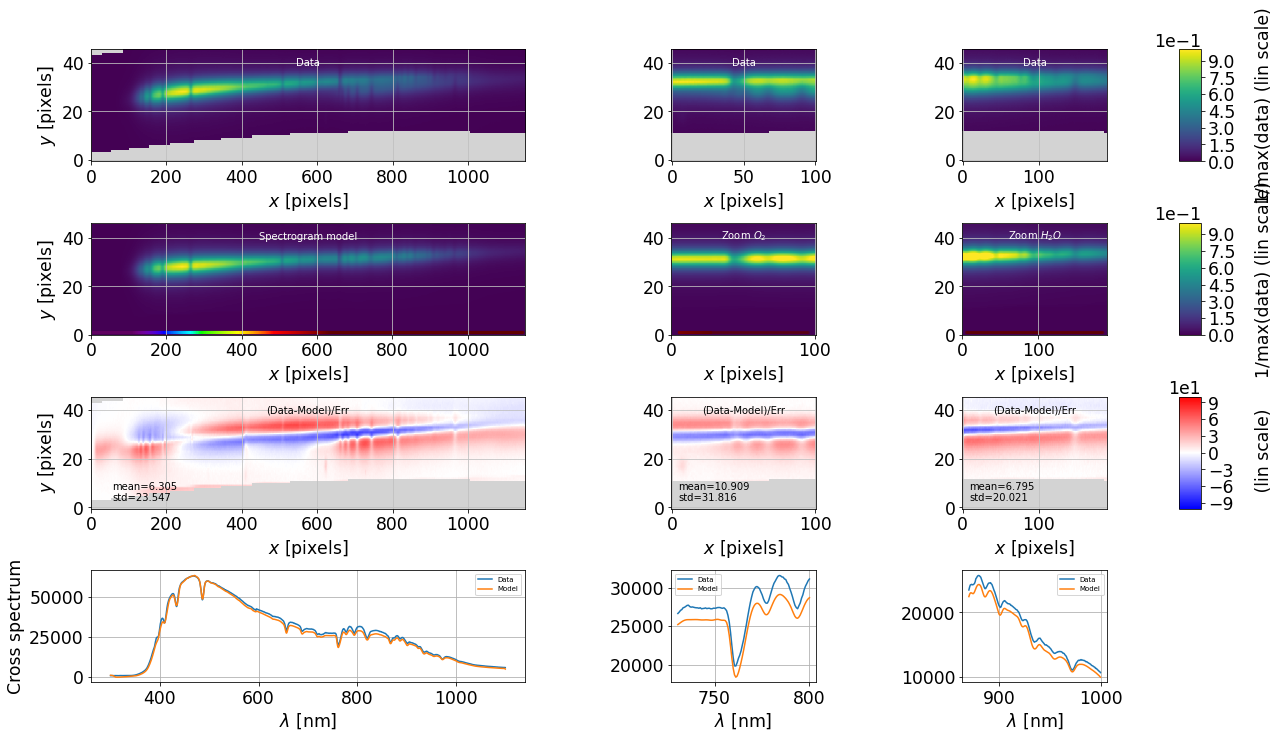

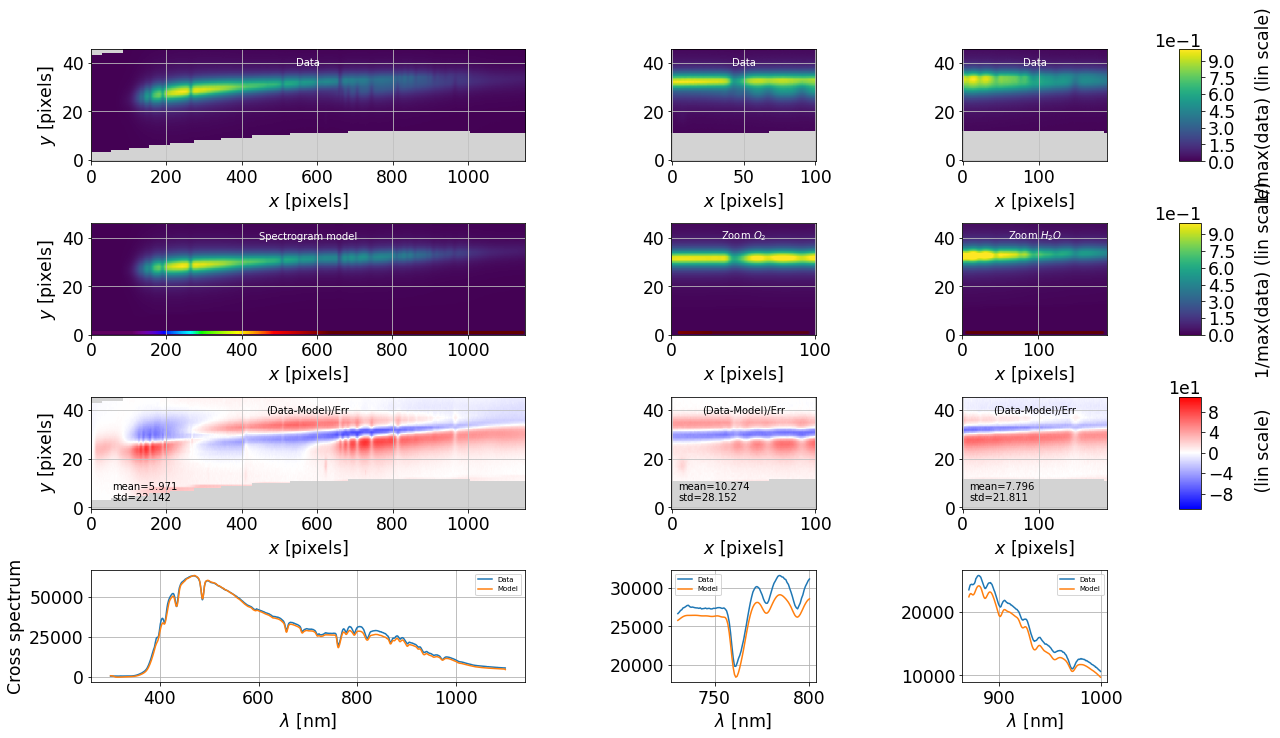

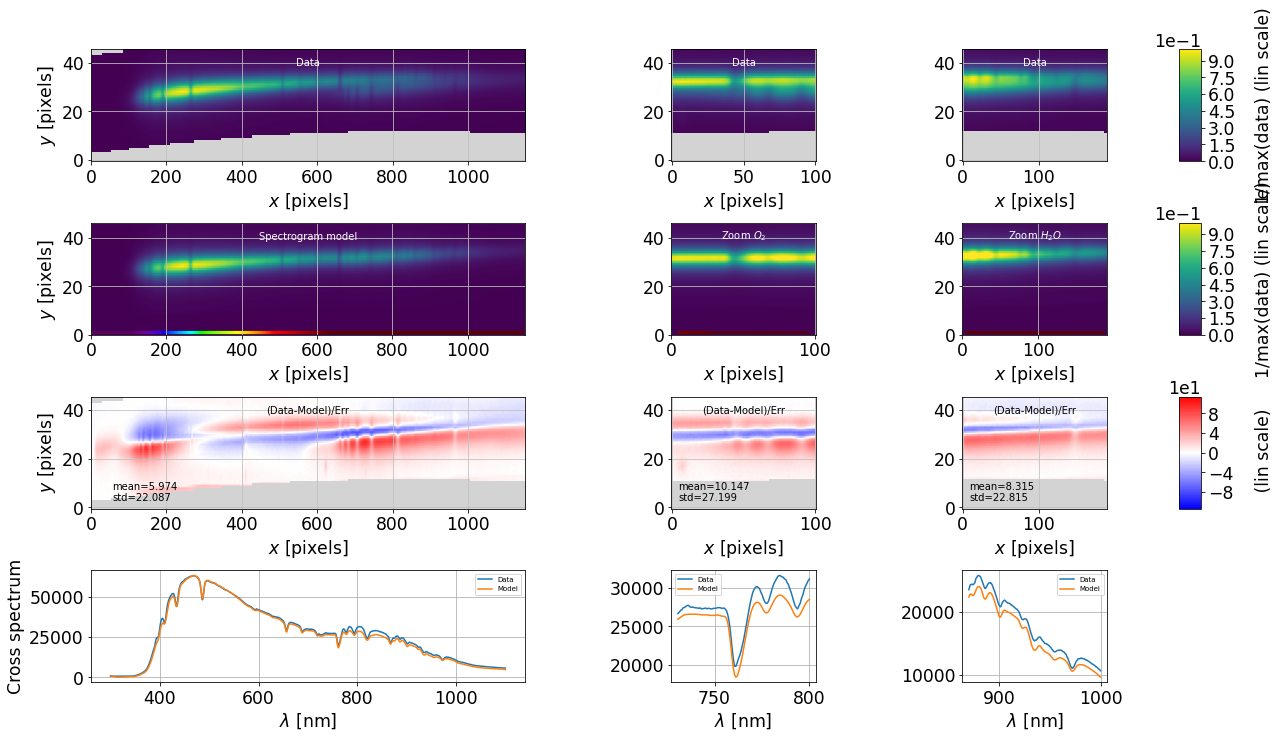

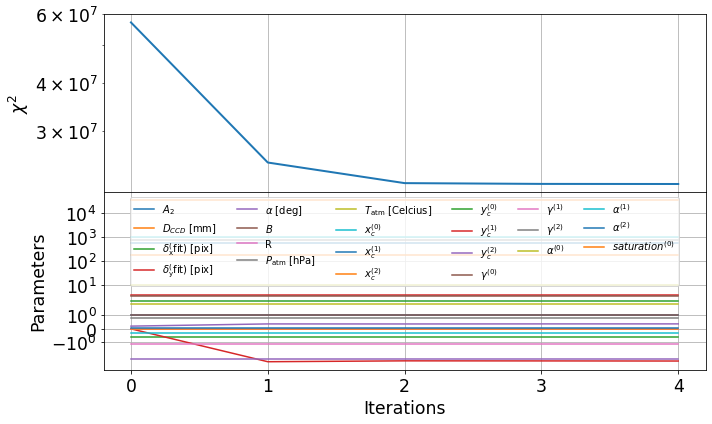

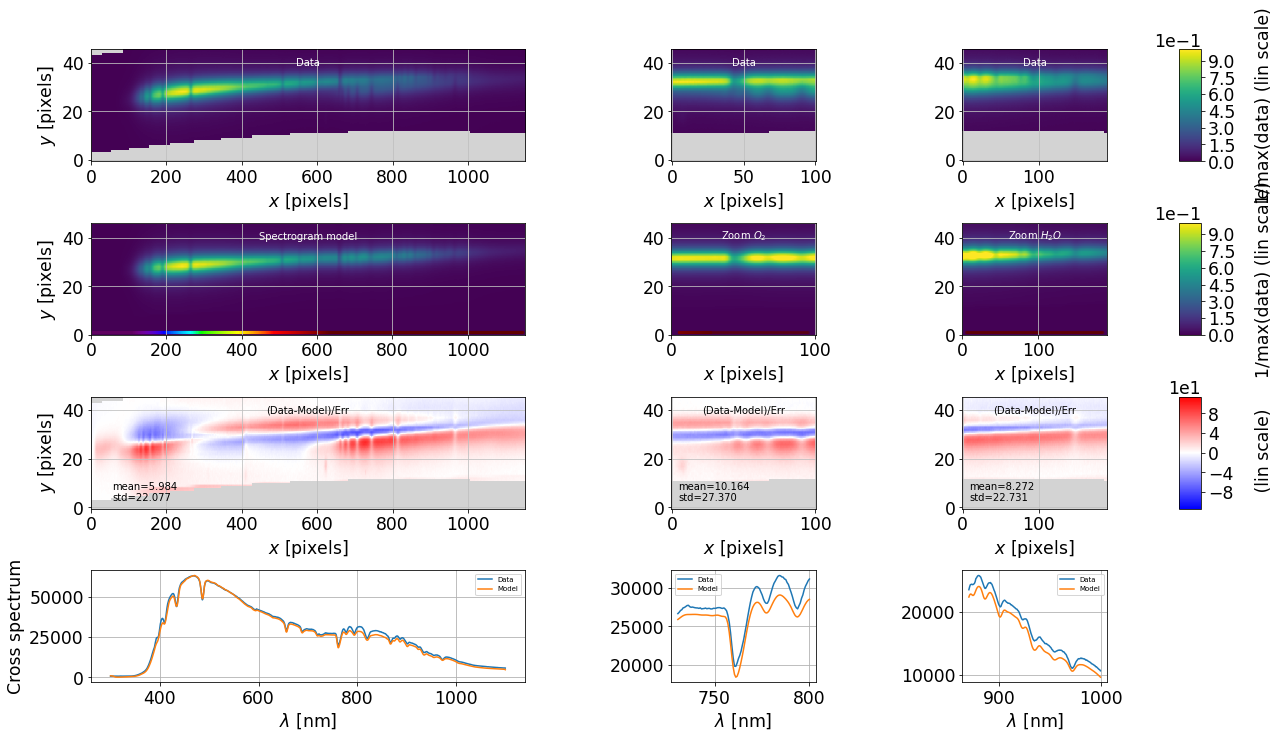

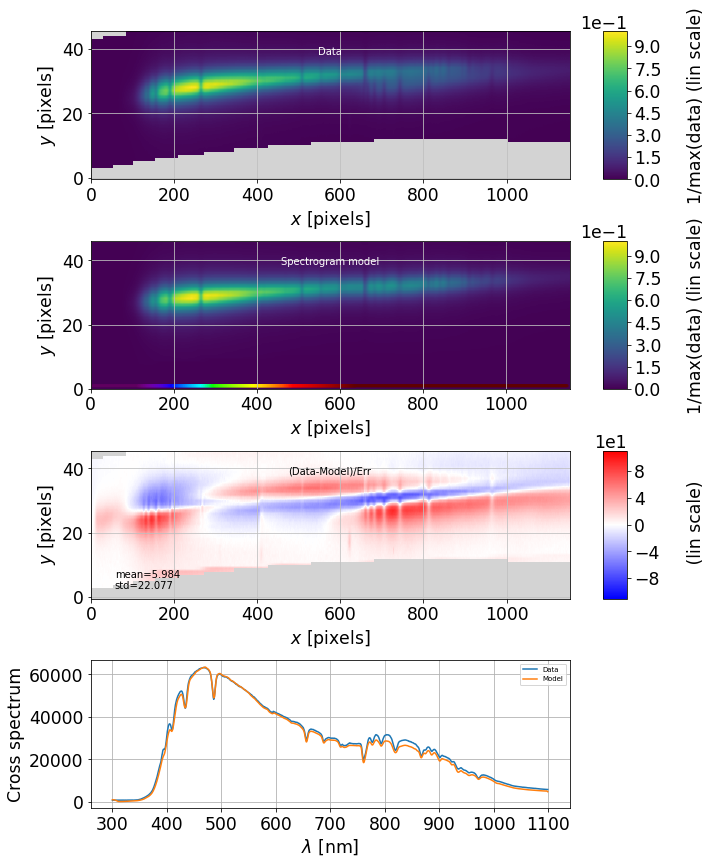

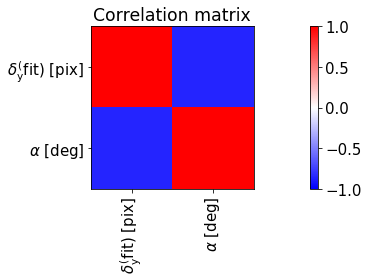

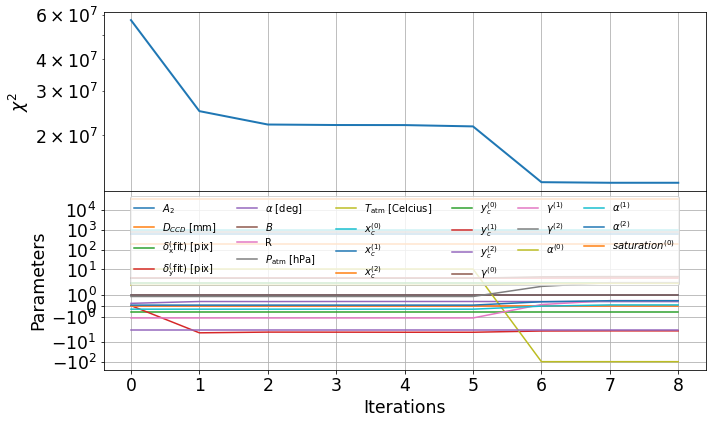

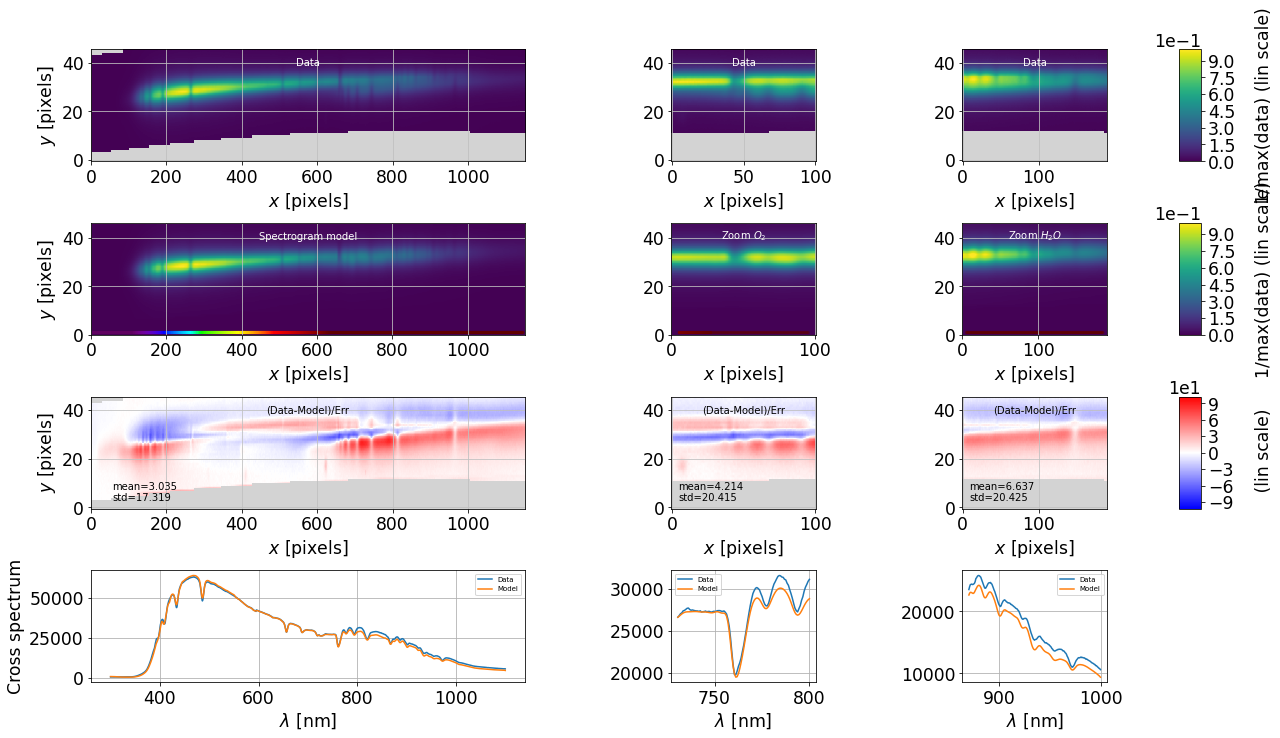

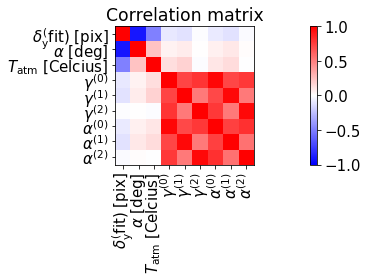

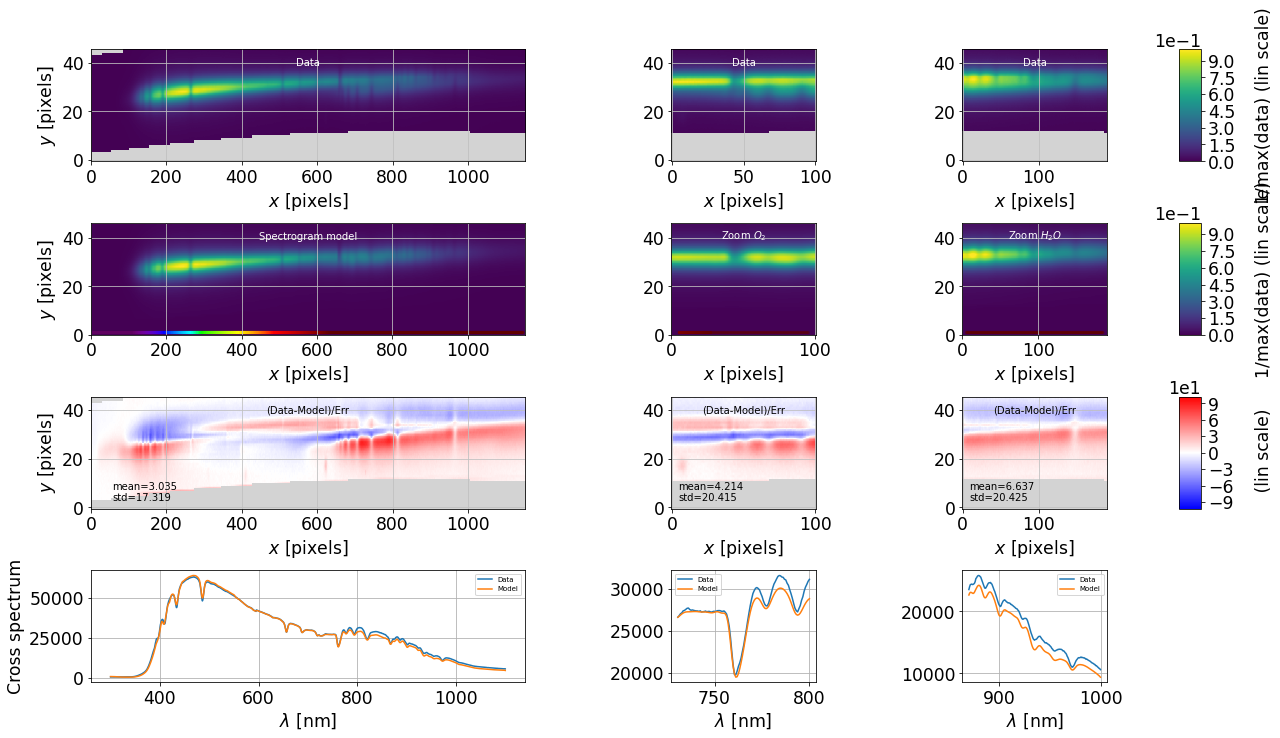

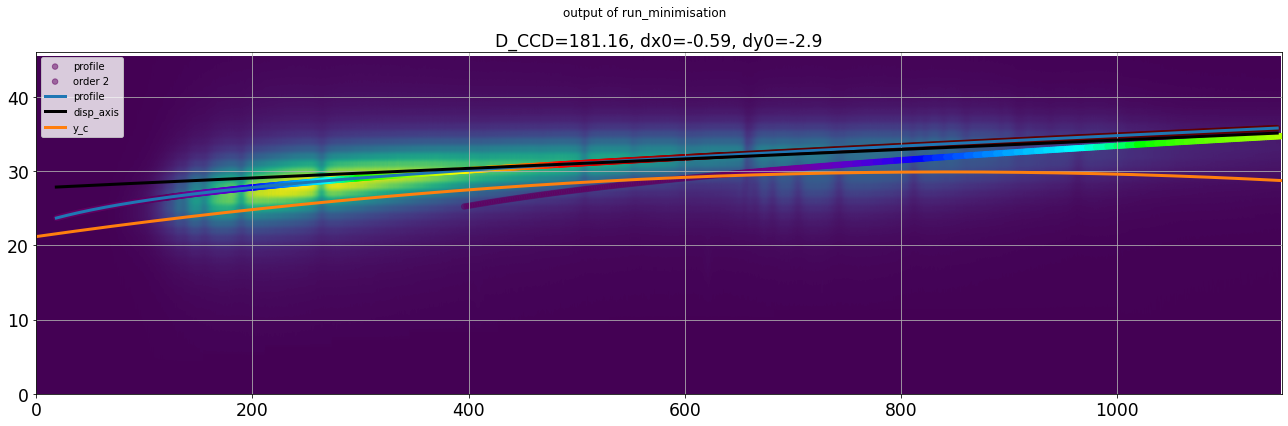

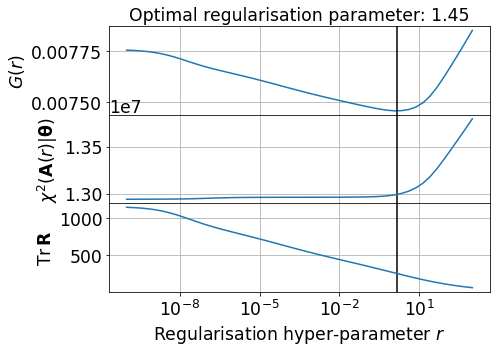

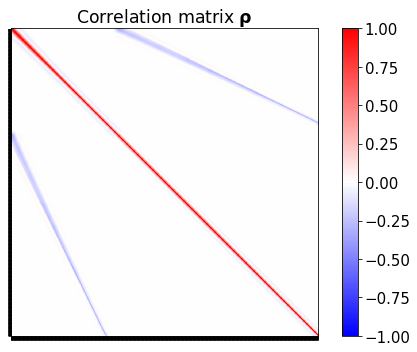

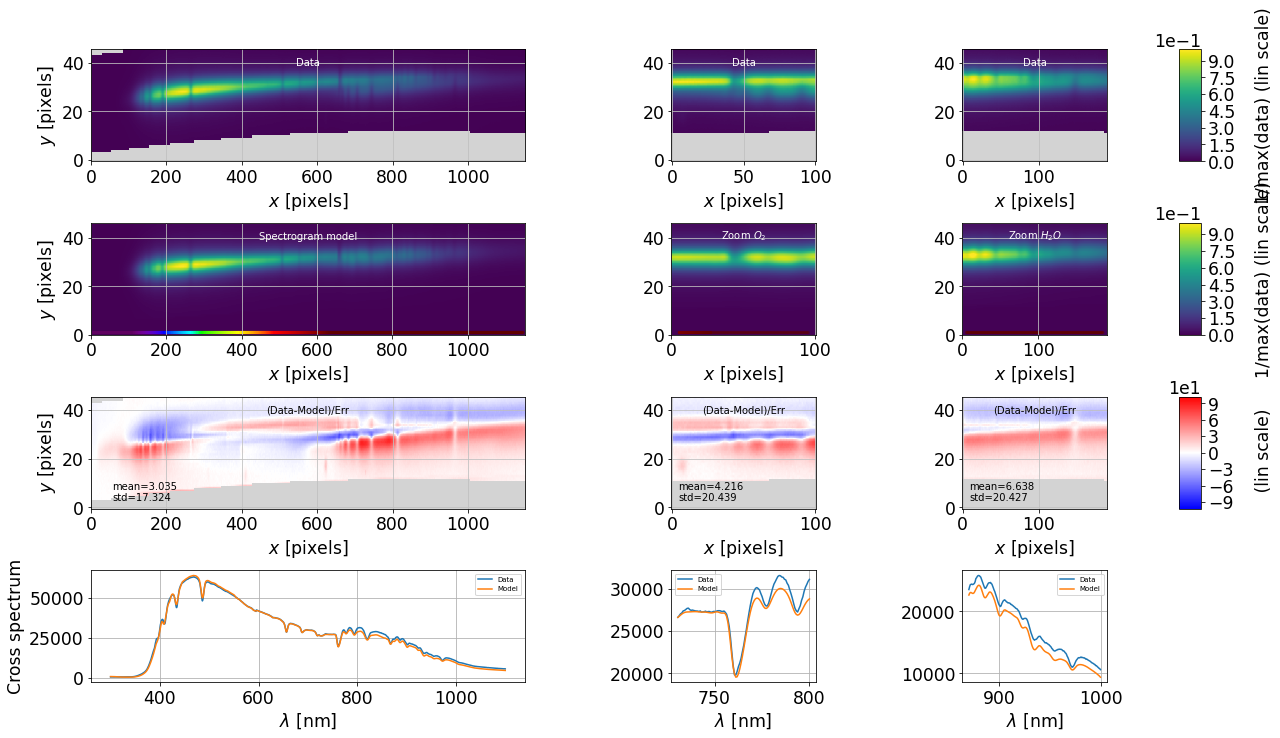

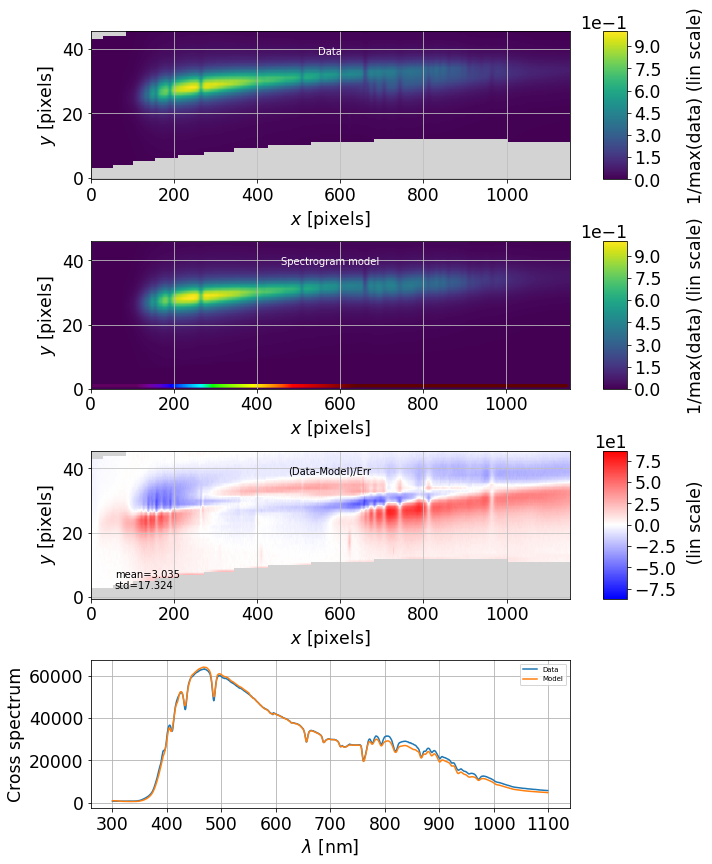

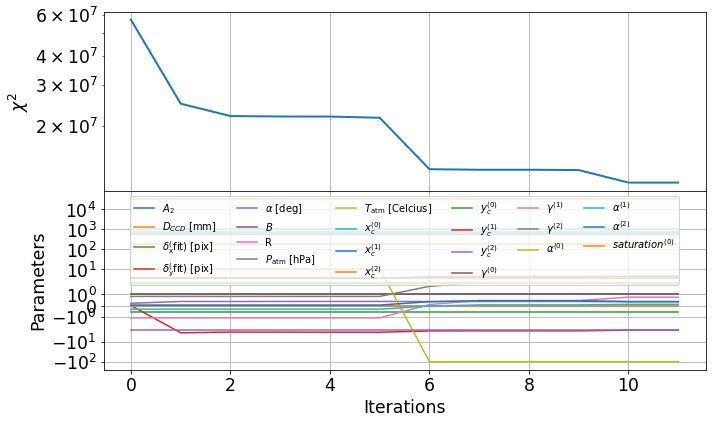

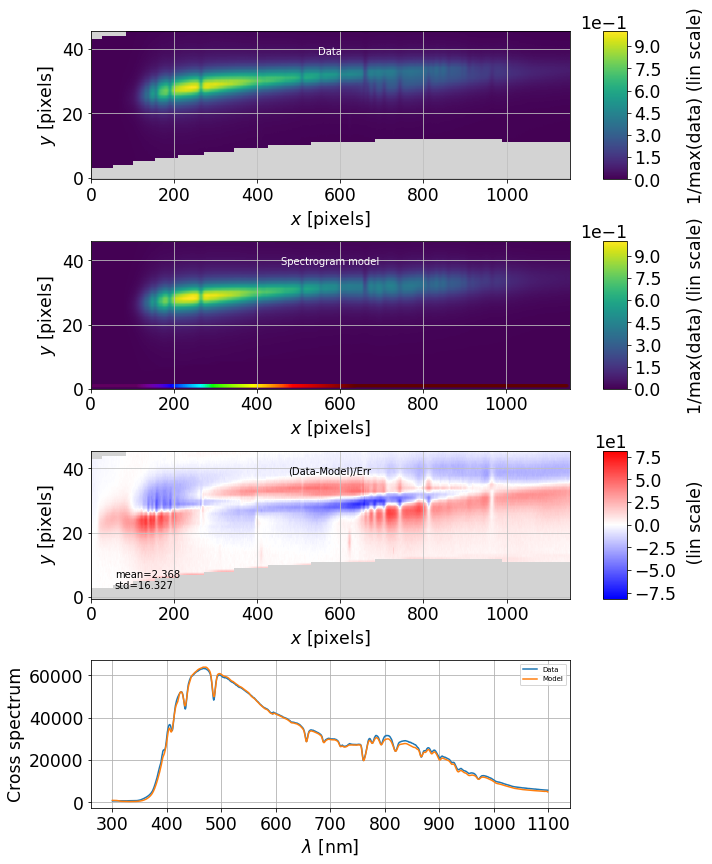

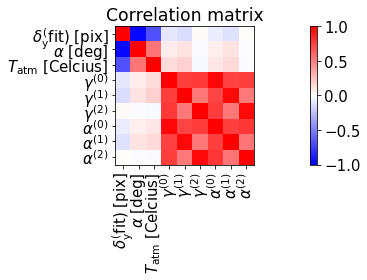

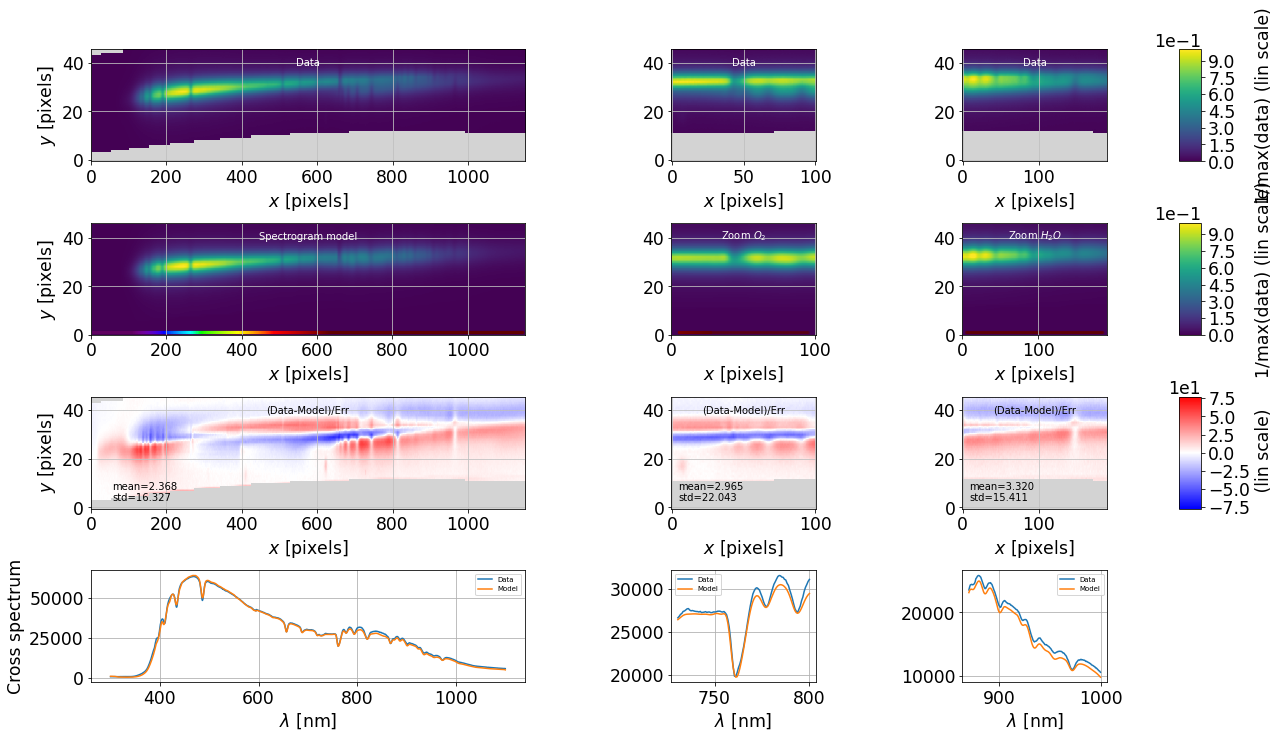

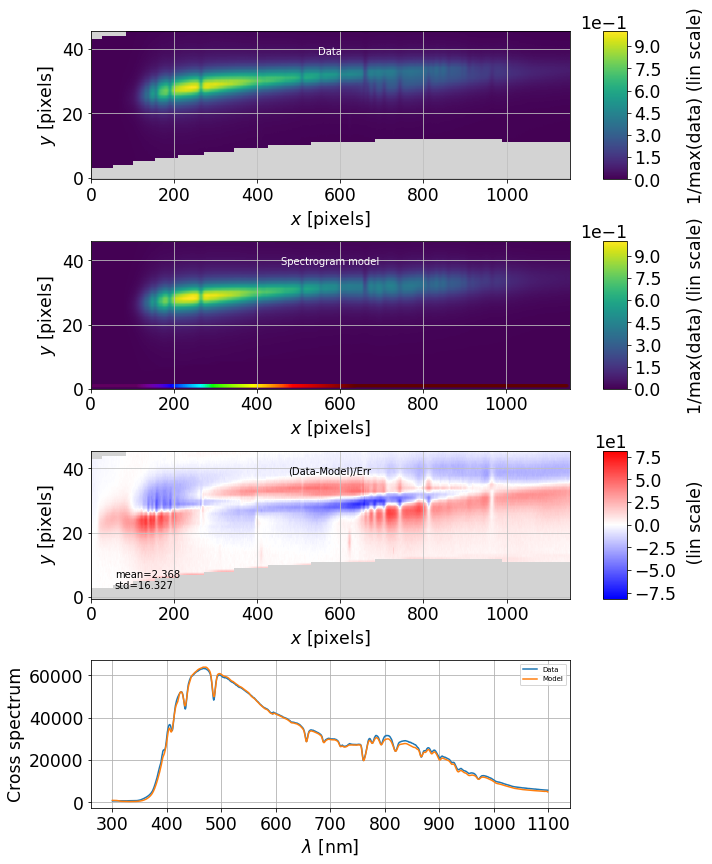

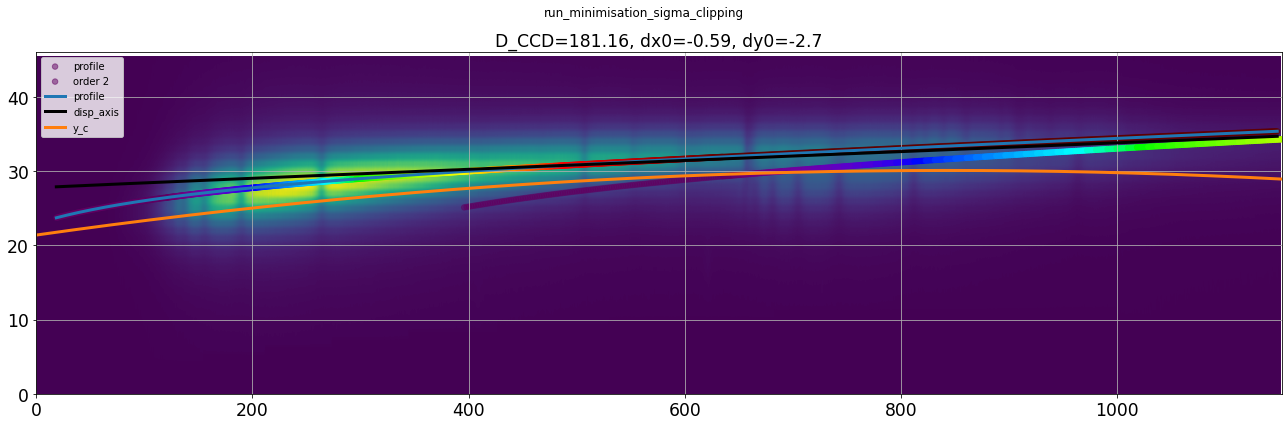

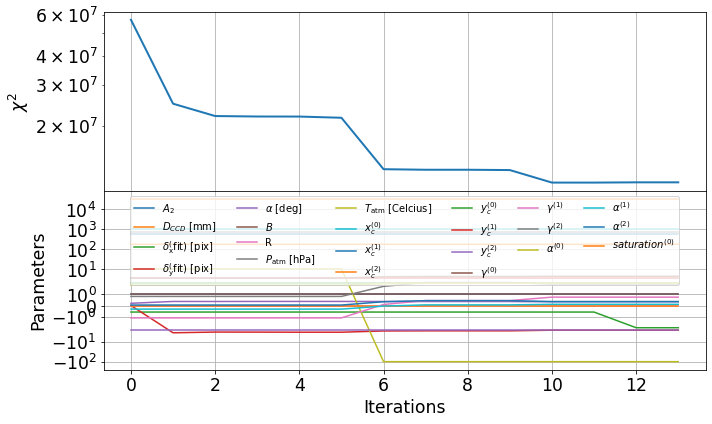

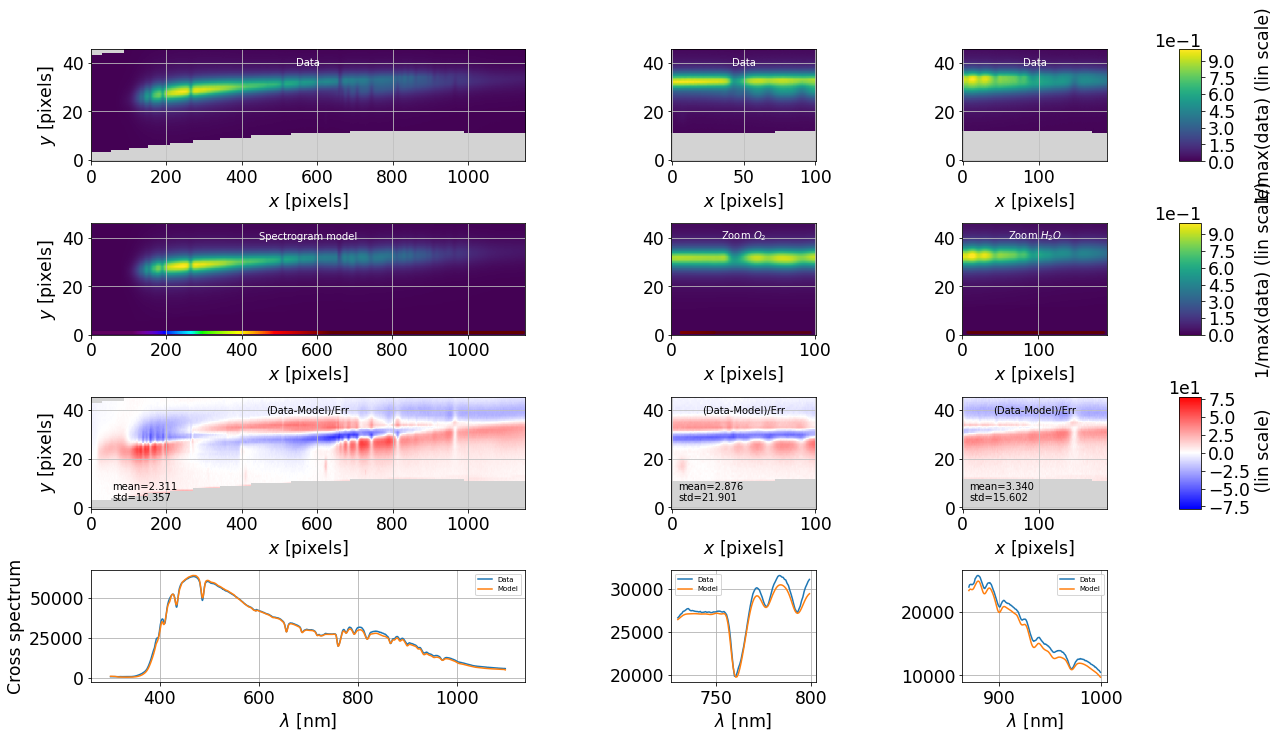

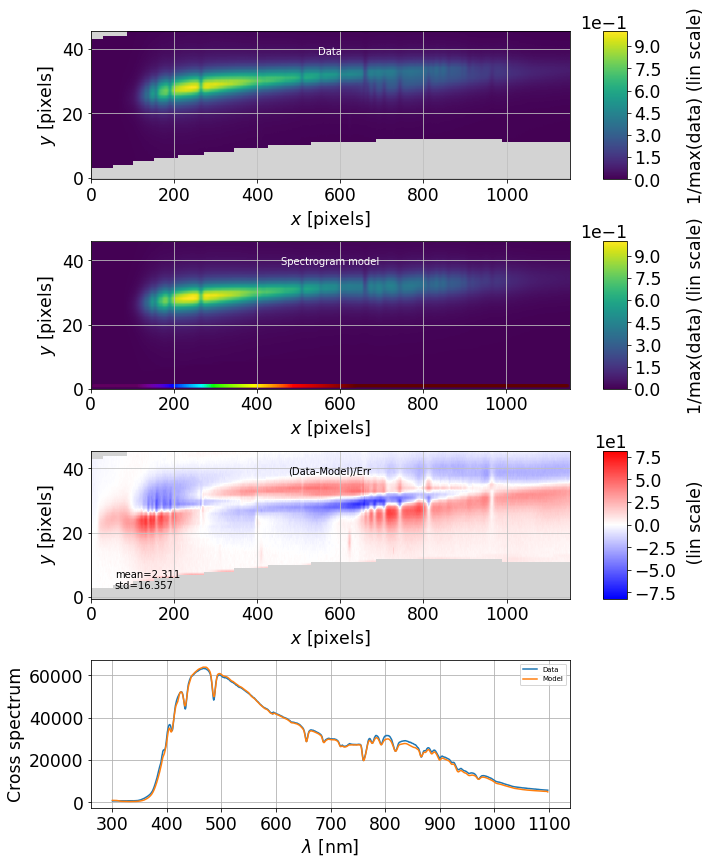

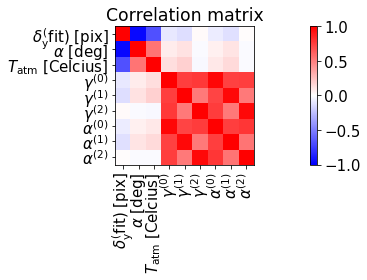

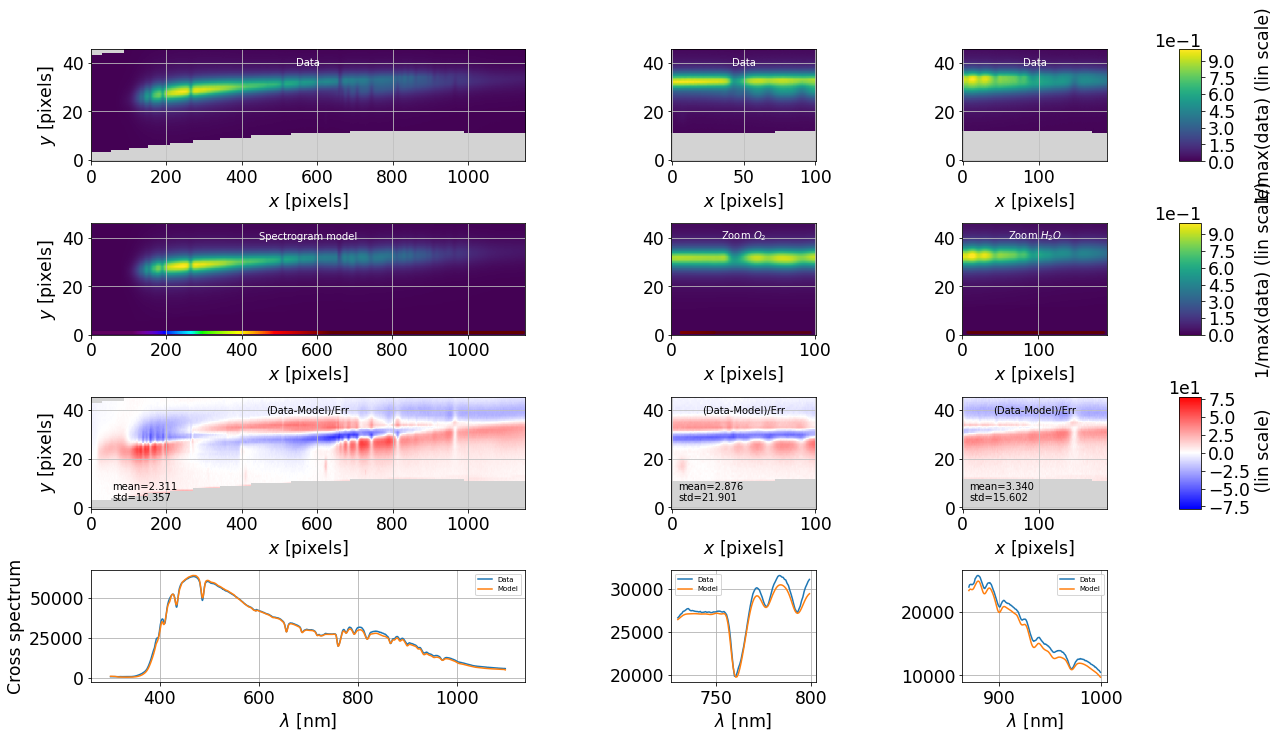

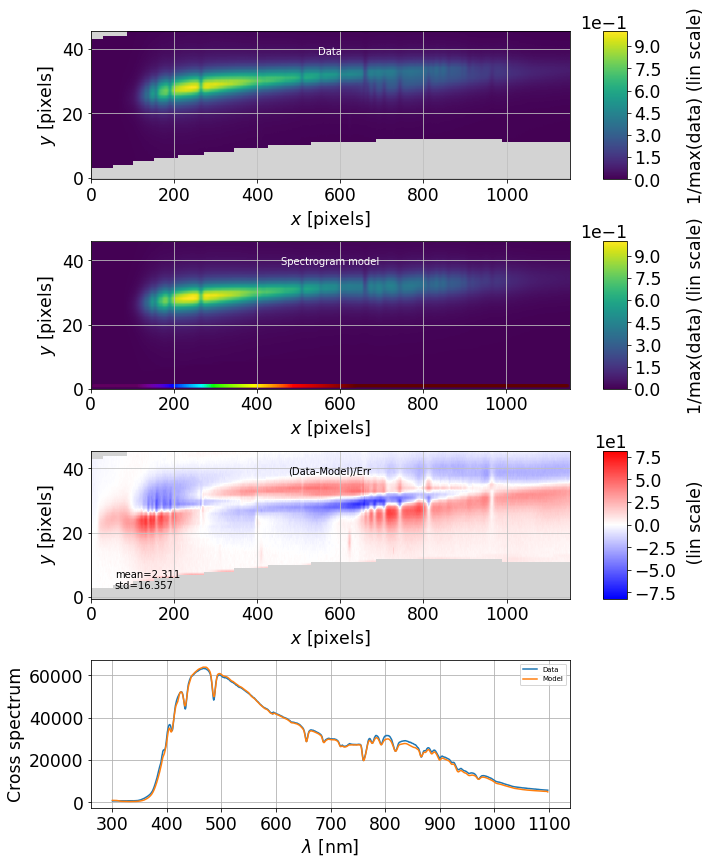

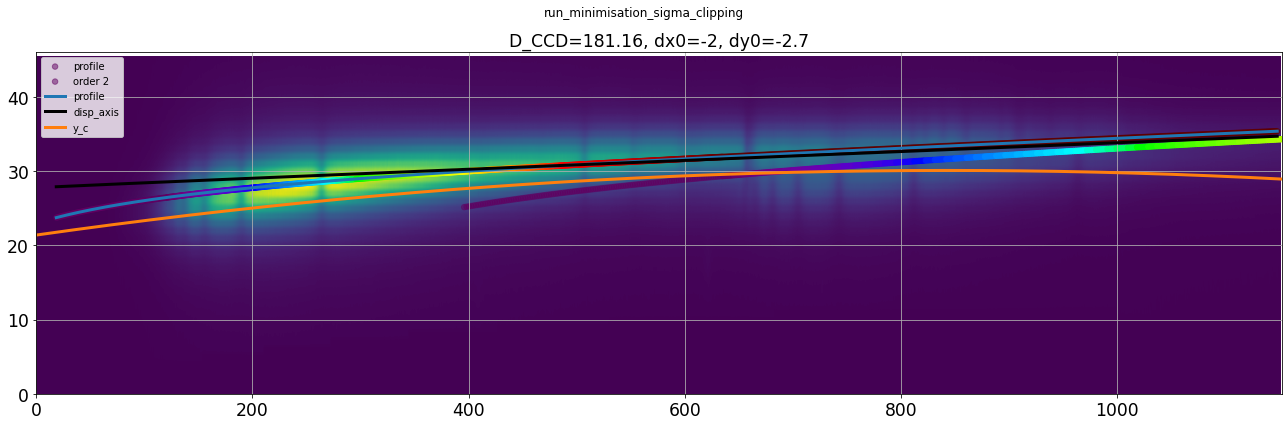

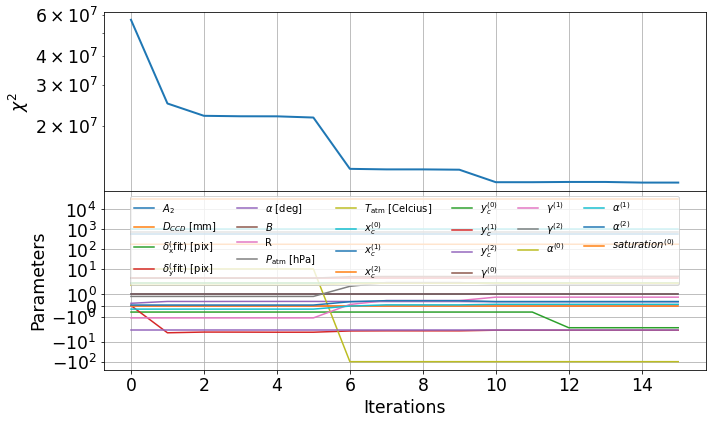

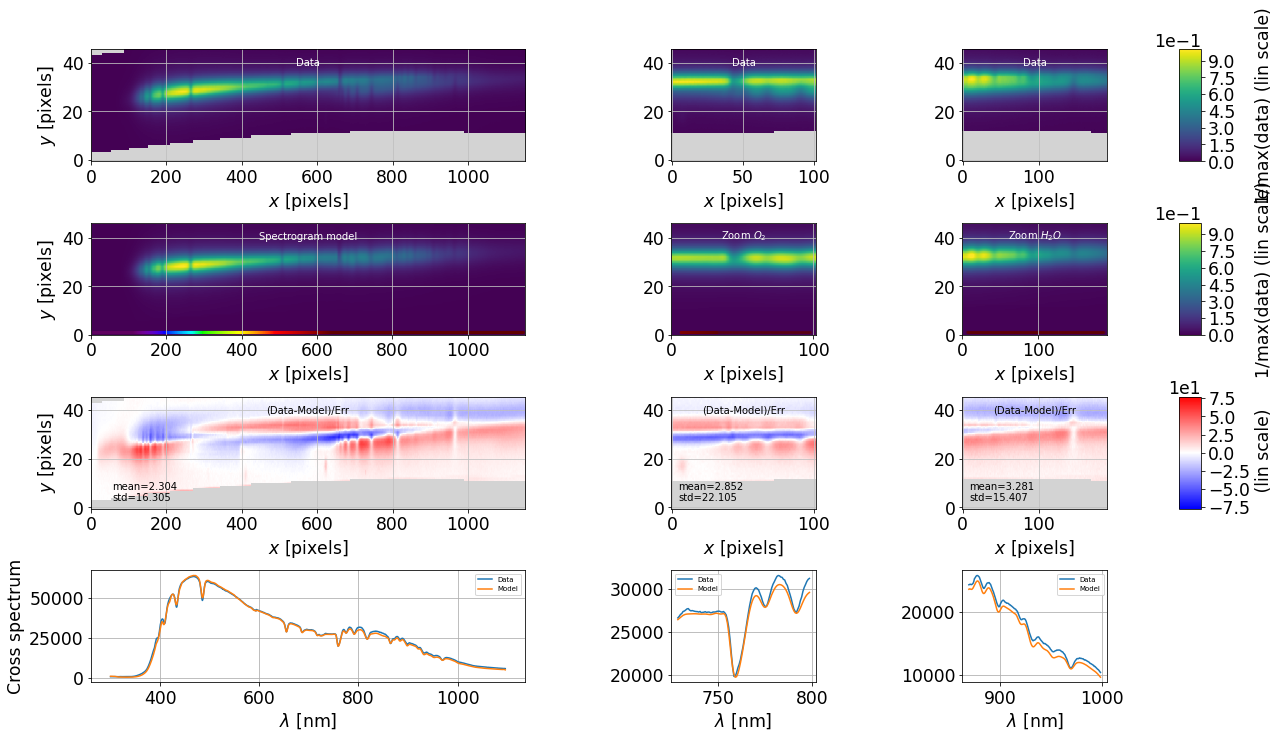

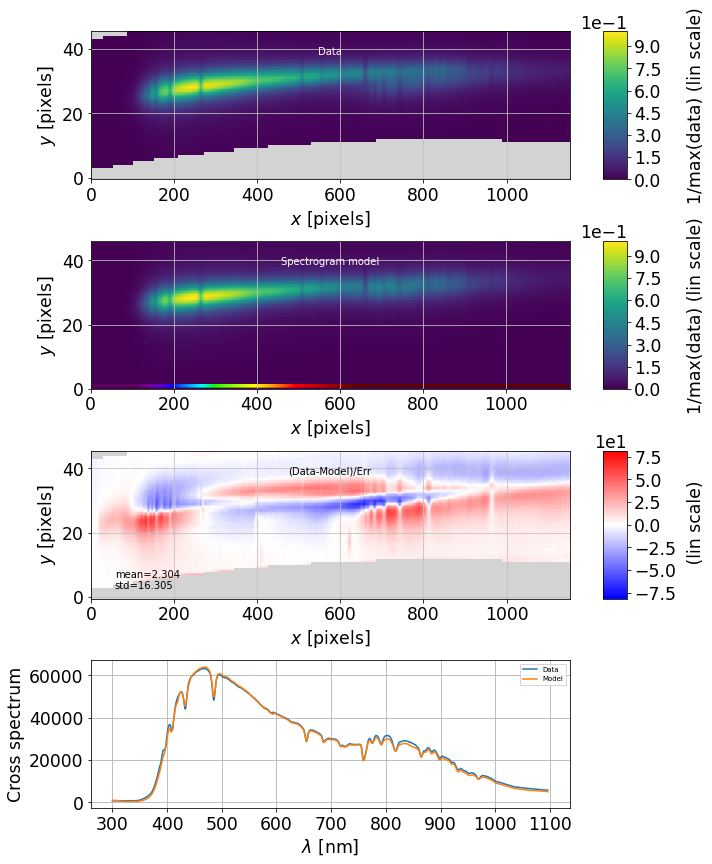

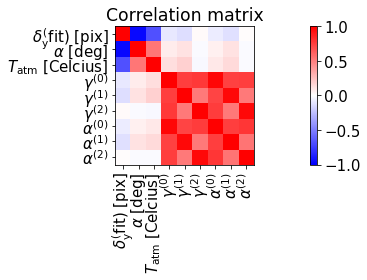

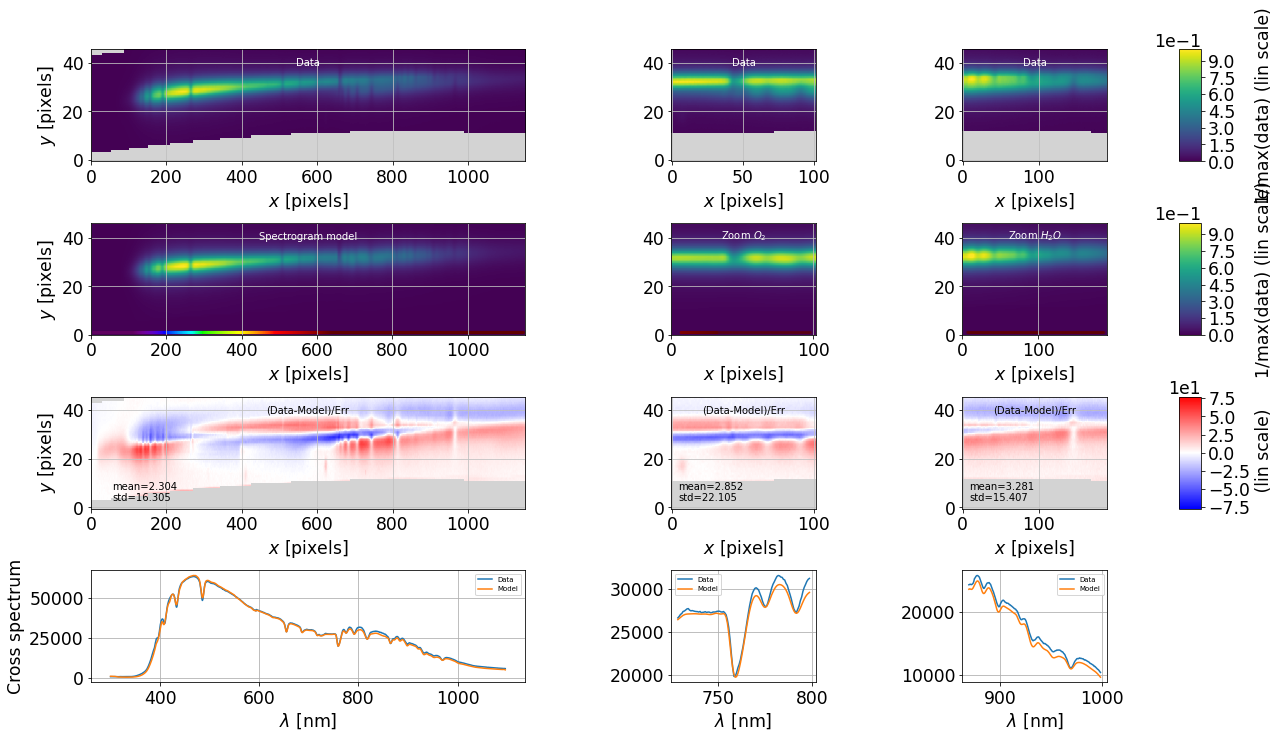

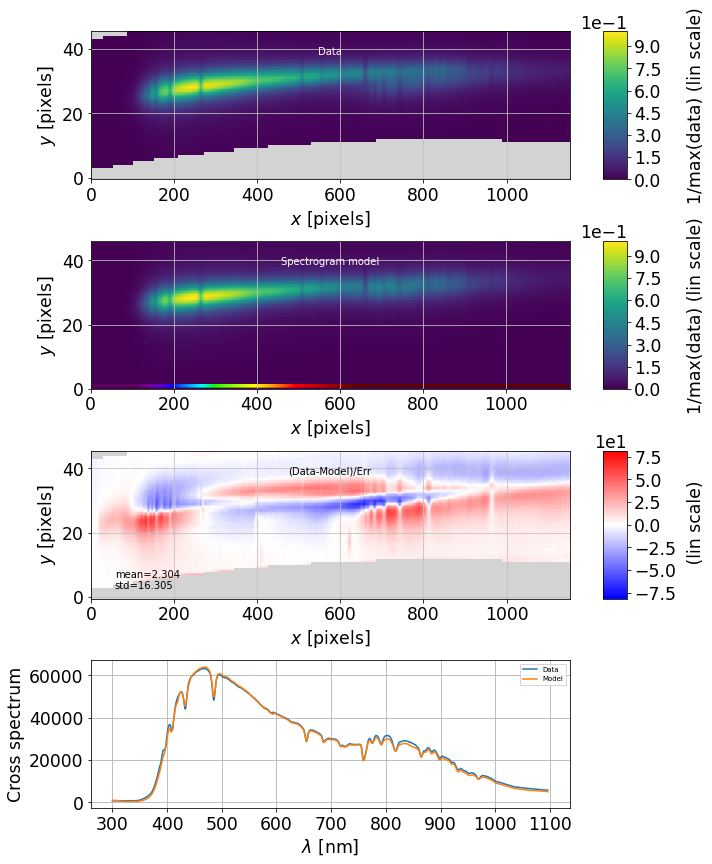

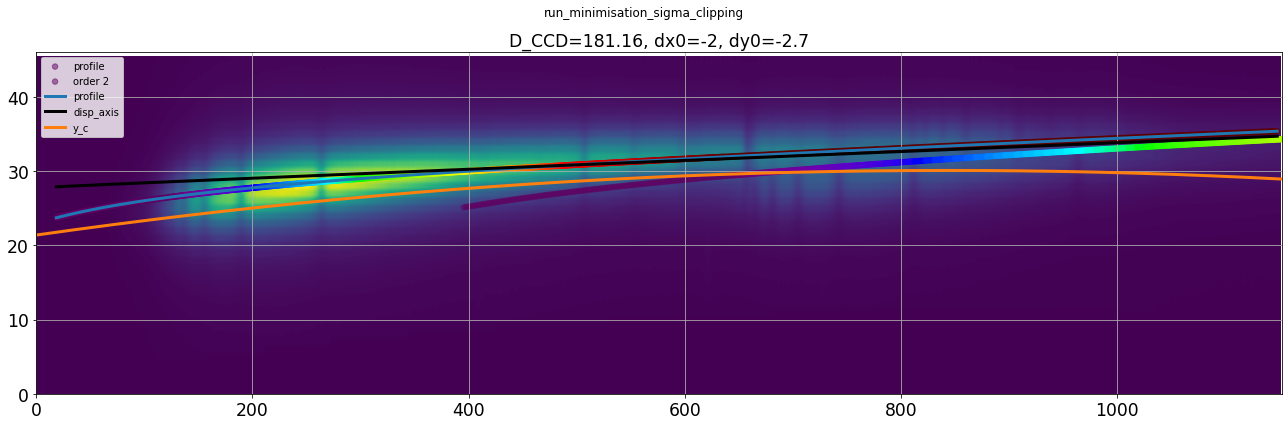

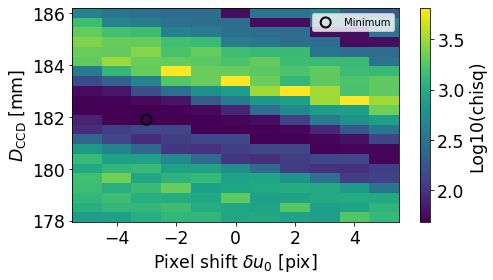

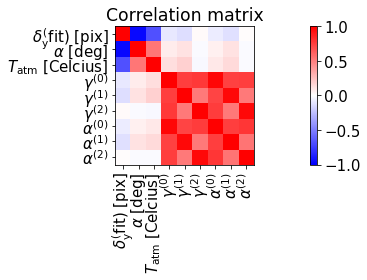

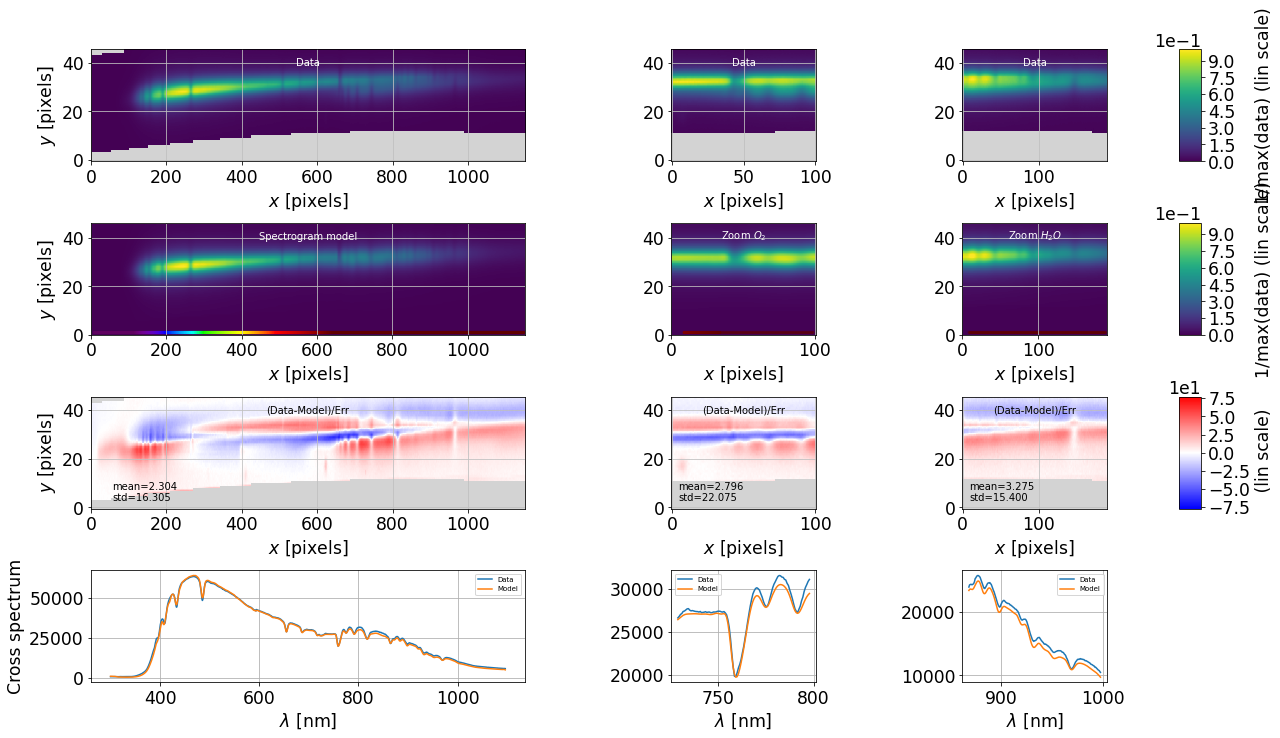

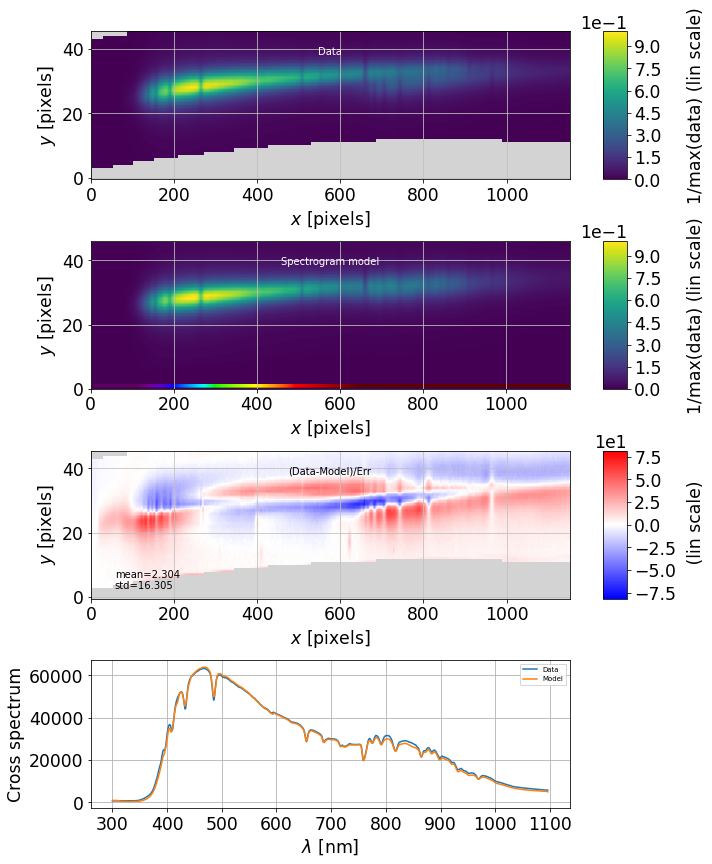

In [63]:
# increase the nulber of iteration
spectrum = run_ffm_minimisation(w, method="newton", niter=3)

In [64]:
#showfitparameter(w)
dumpfitparameters(w,my_logger)

2022-09-09 13:39:02  root       dumpfitparameters    INFO   

- fit param #0 :: A2 = 1.0 	 fixed = True 	 bounds 0.000 - 20.000
- fit param #1 :: D_CCD [mm] = 181.8011615453872 	 fixed = True 	 bounds 178.909 - 183.409
- fit param #2 :: shift_x [pix] = -1.9998989026932215 	 fixed = True 	 bounds -5.000 - 5.000
- fit param #3 :: shift_y [pix] = -2.656720607001684 	 fixed = False 	 bounds -50.000 - 50.000
- fit param #4 :: angle [deg] = 0.3385454048365539 	 fixed = False 	 bounds -90.000 - 90.000
- fit param #5 :: B = 1.0 	 fixed = True 	 bounds 0.200 - 5.000
- fit param #6 :: R = 0.0 	 fixed = True 	 bounds -360.000 - 360.000
- fit param #7 :: P [hPa] = 743.55 	 fixed = True 	 bounds 300.000 - 1100.000
- fit param #8 :: T [Celsius] = -100.0 	 fixed = False 	 bounds -100.000 - 100.000
- fit param #9 :: x_c_0 = 1000.0007321003534 	 fixed = True 	 bounds -inf - inf
- fit param #10 :: x_c_1 = 575.5000000000003 	 fixed = True 	 bounds -inf - inf
- fit param #11 :: x_c_2 = 3.588854710805207e-

   Line   Tabulated  Detected    Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
              nm        nm         nm     ...  reduced       nm          nm     
--------- --------- --------- ----------- ... --------- ----------- ------------
 $Fe_{I}$ 382.06653 379.57697  -2.4895864 ... 1150.2838   2.7063599    12.103722
$Ca_{II}$ 393.38922 390.49738  -2.8918474 ... 1150.2838   0.5083691    0.5345873
$Ca_{II}$ 396.87042 395.12982  -1.7406024 ... 1150.2838   0.2853304   0.28751525
$H\delta$  410.2242  405.2672  -4.9570003 ... 1150.2838   0.6016975    1.0854566
 $Fe_{I}$ 430.81543 430.01797  -0.7974566 ... 1150.2838  0.92649156    2.2833853
$H\gamma$  434.0256 432.44547  -1.5801538 ... 1150.2838   1.3263749    2.9214597
 $Fe_{I}$ 438.38086 439.27594   0.8950709 ... 1150.2838  0.20871037   0.63379085
 $He_{I}$ 447.12637  447.1473 0.020918224 ... 1150.2838  0.63519144     2.419067
 $H\beta$  486.3287 484.53885   -1.789855 ... 30.192905   1.8459384    1.8264543
 $Mg_{I}$ 517.30054  516.951

2022-09-09 13:39:03  astropy    _showwarning         WARNING UnitsWarning: 'reduced' did not parse as fits unit: At col 0, Unit 'reduced' not supported by the FITS standard.  If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html


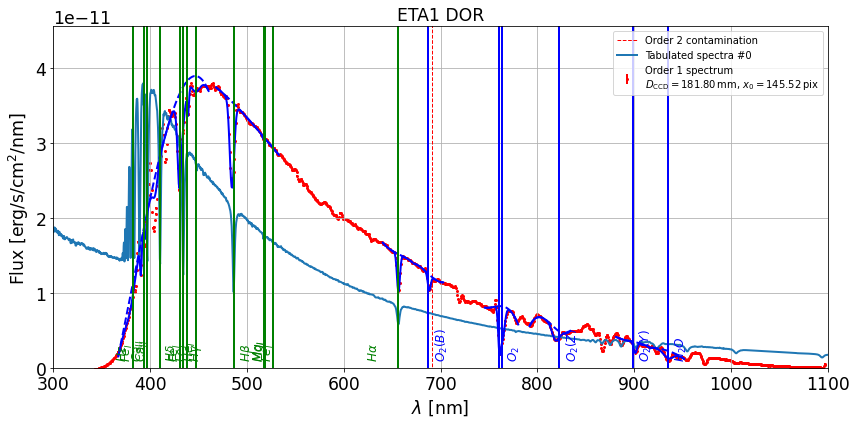

In [65]:
s.plot_spectrum(force_lines=True) 

In [66]:
s.lambdas

array([ 301.8631172 ,  302.56605376,  303.26897957, ..., 1096.30520083,
       1096.97996384, 1097.65468947])

In [67]:
s.data_order2

array([-3456.53421053, -3933.56522305, -3406.42942704, ...,
          33.35523074,    57.13260383,    72.36068355])

Text(0.5, 1.0, 'Order 2')

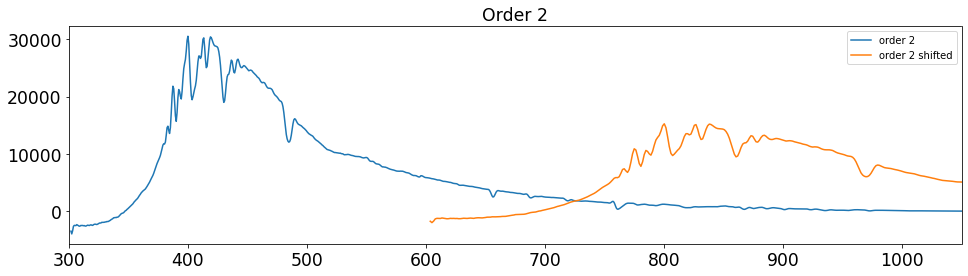

In [68]:
plt.plot(s.lambdas,s.data_order2,label="order 2")
plt.plot(2*s.lambdas,s.data_order2/2,label="order 2 shifted")
plt.xlim(300,1050)
plt.legend()
plt.title("Order 2")

Text(0.5, 1.0, 'Order 1')

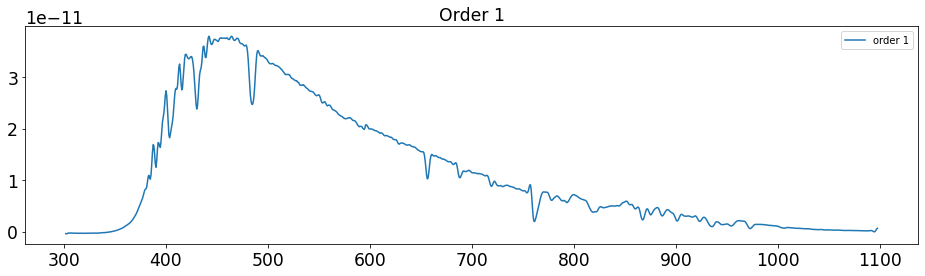

In [69]:
plt.plot(s.lambdas,s.data,label="order 1")
plt.legend()
plt.title("Order 1")